In [0]:
import time

import pandas as pd
import numpy as np
from pyspark.sql.functions import count,isnan, when, avg, col, from_unixtime, lit, months_between,floor, unix_timestamp,countDistinct, expr, datediff, lag, desc
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import LogisticRegression, GBTClassifier, LinearSVC, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [0]:
# Spark Session
spark = SparkSession \
    .builder \
    .appName("Sparkify") \
    .getOrCreate()

In [0]:
path = "s3n://udacity-dsnd/sparkify/sparkify_event_data.json"
df = spark.read.json(path)

In [0]:
# file_location = "/FileStore/tables/medium_sparkify_event_data_json.gz"
# file_type = "json"

# df = spark.read.format(file_type)\
#      .option("inferSchema", "false")\
#      .option("header", "false")\
#      .option("sep", ",")\
#      .load(file_location)

# # df = spark.read.csv("/FileStore/tables/medium_sparkify_event_data_json.gz")

display(df)

artist auth firstName gender itemInSession lastName length level location method page registration sessionId song status ts userAgent userId Popol Vuh Logged In Shlok M 278 Johnson 524.32934 paid Dallas-Fort Worth-Arlington, TX PUT NextSong 1533734541000 22683 Ich mache einen Spiegel - Dream Part 4 200 1538352001000 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1749042 Los Bunkers Logged In Vianney F 9 Miller 238.39302 paid San Francisco-Oakland-Hayward, CA PUT NextSong 1537500318000 20836 MiÃÂ©ntele 200 1538352002000 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1563081 Lush Logged In Vina F 109 Bailey 140.35546 paid Hilo, HI PUT NextSong 1536414505000 4593 Baby Talk 200 1538352002000 Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:31.0) Gecko/20100101 Firefox/31.0 1697168 Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner Logged In Andres M 71 Foley 277.15873 paid Watertown, SD PUT NextSong 1534386660000 6370 Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) 200 1538352003000 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.77.4 (KHTML, like Gecko) Version/7.0.5 Safari/537.77.4" 1222580 Yes Logged In Aaliyah F 21 Ramirez 1121.25342 paid Baltimore-Columbia-Towson, MD PUT NextSong 1537381415000 22316 Close To The Edge (I. The Solid Time Of Change_ II. Total Mass Retain_ III. I Get Up I Get Down_ IV. Seasons Of Man) (Remastered LP Version) 200 1538352003000 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1714398 MGMT Logged In Ryan M 8 Williams 229.25016 paid Cape Coral-Fort Myers, FL PUT NextSong 1537602560000 23924 Electric Feel 200 1538352004000 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1010522 Animal Collective Logged In Isaac M 6 Brown 313.5473 free Kokomo, IN PUT NextSong 1536563853000 1746 Bluish 200 1538352005000 Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0 1475659 Eminem Logged In Jonathan M 29 Martin 250.8273 free New York-Newark-Jersey City, NY-NJ-PA PUT NextSong 1538069376000 22483 Mockingbird 200 1538352006000 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36" 1465194 Leona Lewis Logged In Jennifer F 0 Shelton 203.88526 free Pittsburgh, PA PUT NextSong 1536455539000 25128 Forgive Me 200 1538352006000 "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1558463 The Cranberries Logged In Michael M 13 Riley 183.87546 paid Albany-Schenectady-Troy, NY PUT NextSong 1533220062000 3992 The Concept 200 1538352006000 "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1605667 Mariah Carey Logged In Azari M 37 Hansen 265.9522 free Martinsville, VA PUT NextSong 1534393835000 14642 Anytime You Need A Friend 200 1538352006000 "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36" 1385500 Johnny Cash with The Carter Family Logged In Riley F 300 Hernandez 199.81016 paid Reading, PA PUT NextSong 1537618545000 14853 Nine Pound Hammer 200 1538352006000 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2" 1032628 Gorillaz Logged In Brian M 73 Allen 131.91791 free San Diego-Carlsbad, CA PUT NextSong 1537868758000 2526 Don't Get Lost In Heaven 200 1538352007000 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2" 1901081 Los Prisioneros Logged In Brayden M 95 Armstrong 248.78975 paid Dallas-Fort Worth-Arlington, TX PUT NextSong 1534635513000 23917 La Voz De Los '80 200 1538352007000 "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML,

In [0]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [0]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId|song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
|     0|   0|        0|     0|            0|       0|     0|    0|       0|     0|   0|           0|        0|   3|     0|  0|        0|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+



In [0]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+----+---------+------+-------------+--------+-------+-----+--------+------+----+------------+---------+-------+------+---+---------+------+
| artist|auth|firstName|gender|itemInSession|lastName| length|level|location|method|page|registration|sessionId|   song|status| ts|userAgent|userId|
+-------+----+---------+------+-------------+--------+-------+-----+--------+------+----+------------+---------+-------+------+---+---------+------+
|5408927|   0|   778479|778479|            0|  778479|5408927|    0|  778479|     0|   0|      778479|        0|5408927|     0|  0|   778479|     0|
+-------+----+---------+------+-------------+--------+-------+-----+--------+------+----+------------+---------+-------+------+---+---------+------+



In [0]:
#lets filter out the entries with missing names
df = df.filter(df.firstName.isNotNull())

In [0]:
df.describe("ts").show(truncate = False)

+-------+---------------------+
|summary|ts                   |
+-------+---------------------+
|count  |25480720             |
|mean   |1.5409073800544165E12|
|stddev |1.5154756164238734E9 |
|min    |1538352001000        |
|max    |1543622402000        |
+-------+---------------------+



In [0]:
# Remove rows with corrupted timestamps
df = df.where(df.ts <= 1543622399000)
df.count()

Out[15]: 25480718

In [0]:
ts = int(1538352011000)
ts /= 1000
print("Start Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

ts = int(1543622466000)
ts /= 1000
print("End Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

Start Time: 2018-10-01 00:00:11
End Time: 2018-12-01 00:01:06


In [0]:
# add a constant column for start date
df = df.withColumn('start_date', lit('2018-10-01 00:00:11'))

In [0]:
# time in seconds
convert_to_seconds = udf(lambda x : x//1000, IntegerType())
df = df.withColumn("adj_ts", convert_to_seconds('ts'))
df = df.withColumn("adj_reg", convert_to_seconds('registration'))

# drop all the timestamp columns. Will not need them
columns_to_drop = ['registration', 'ts']
df = df.drop(*columns_to_drop)

# converting to utc format
df = df.withColumn("ts", from_unixtime(col("adj_ts")))
df = df.withColumn("registration", from_unixtime(col("adj_reg")))

columns_to_drop = ['adj_ts', 'adj_reg']
df = df.drop(*columns_to_drop)


In [0]:
# number the months starting from the very first month of the analysis
df = df.withColumn("months_btw", floor(months_between(df.ts, df.start_date)))

In [0]:
def define_churn(x):
    """
    Defining churn as cancellation of service or downgrading from premium to free tier.
    """
    if x == "Cancellation Confirmation":
        return 1
    elif x == "Submit Downgrade":
        return 1
    else:
        return 0
    
churn_event = udf(lambda x : define_churn(x), IntegerType())
df = df.withColumn("churn", churn_event("page"))

In [0]:
# encoding free and paid as 0 and 1 
df = df.replace(["free", "paid"], ["0", "1"], "level")

# encoding male and female as 0 and 1
df = df.replace(["M", "F"], ["0", "1"], "gender")

In [0]:
display(df)

artist auth firstName gender itemInSession lastName length level location method page sessionId song status userAgent userId start_date ts registration months_btw churn Popol Vuh Logged In Shlok 0 278 Johnson 524.32934 1 Dallas-Fort Worth-Arlington, TX PUT NextSong 22683 Ich mache einen Spiegel - Dream Part 4 200 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1749042 2018-10-01 00:00:11 2018-10-01 00:00:01 2018-08-08 13:22:21 0 0 Los Bunkers Logged In Vianney 1 9 Miller 238.39302 1 San Francisco-Oakland-Hayward, CA PUT NextSong 20836 MiÃÂ©ntele 200 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1563081 2018-10-01 00:00:11 2018-10-01 00:00:02 2018-09-21 03:25:18 0 0 Lush Logged In Vina 1 109 Bailey 140.35546 1 Hilo, HI PUT NextSong 4593 Baby Talk 200 Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:31.0) Gecko/20100101 Firefox/31.0 1697168 2018-10-01 00:00:11 2018-10-01 00:00:02 2018-09-08 13:48:25 0 0 Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner Logged In Andres 0 71 Foley 277.15873 1 Watertown, SD PUT NextSong 6370 Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) 200 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.77.4 (KHTML, like Gecko) Version/7.0.5 Safari/537.77.4" 1222580 2018-10-01 00:00:11 2018-10-01 00:00:03 2018-08-16 02:31:00 0 0 Yes Logged In Aaliyah 1 21 Ramirez 1121.25342 1 Baltimore-Columbia-Towson, MD PUT NextSong 22316 Close To The Edge (I. The Solid Time Of Change_ II. Total Mass Retain_ III. I Get Up I Get Down_ IV. Seasons Of Man) (Remastered LP Version) 200 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1714398 2018-10-01 00:00:11 2018-10-01 00:00:03 2018-09-19 18:23:35 0 0 MGMT Logged In Ryan 0 8 Williams 229.25016 1 Cape Coral-Fort Myers, FL PUT NextSong 23924 Electric Feel 200 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1010522 2018-10-01 00:00:11 2018-10-01 00:00:04 2018-09-22 07:49:20 0 0 Animal Collective Logged In Isaac 0 6 Brown 313.5473 0 Kokomo, IN PUT NextSong 1746 Bluish 200 Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0 1475659 2018-10-01 00:00:11 2018-10-01 00:00:05 2018-09-10 07:17:33 0 0 Eminem Logged In Jonathan 0 29 Martin 250.8273 0 New York-Newark-Jersey City, NY-NJ-PA PUT NextSong 22483 Mockingbird 200 "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36" 1465194 2018-10-01 00:00:11 2018-10-01 00:00:06 2018-09-27 17:29:36 0 0 Leona Lewis Logged In Jennifer 1 0 Shelton 203.88526 0 Pittsburgh, PA PUT NextSong 25128 Forgive Me 200 "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1558463 2018-10-01 00:00:11 2018-10-01 00:00:06 2018-09-09 01:12:19 0 0 The Cranberries Logged In Michael 0 13 Riley 183.87546 1 Albany-Schenectady-Troy, NY PUT NextSong 3992 The Concept 200 "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36" 1605667 2018-10-01 00:00:11 2018-10-01 00:00:06 2018-08-02 14:27:42 0 0 Mariah Carey Logged In Azari 0 37 Hansen 265.9522 0 Martinsville, VA PUT NextSong 14642 Anytime You Need A Friend 200 "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36" 1385500 2018-10-01 00:00:11 2018-10-01 00:00:06 2018-08-16 04:30:35 0 0 Johnny Cash with The Carter Family Logged In Riley 1 300 Hernandez 199.81016 1 Reading, PA PUT NextSong 14853 Nine Pound Hammer 200 "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2" 1032628 2018-10-01 00:00:11 2018-10-01 00:00:06 2018-09-22 12:15:45 0 0 Gorillaz Logged In Brian 0 73 Allen 131.91791 0 San Diego-Carlsbad, CA PUT NextSo

In [0]:
df.select("page").dropDuplicates().show(truncate = False)

+-------------------------+
|page                     |
+-------------------------+
|Cancel                   |
|Submit Downgrade         |
|Thumbs Down              |
|Home                     |
|Downgrade                |
|Roll Advert              |
|Logout                   |
|Save Settings            |
|Cancellation Confirmation|
|About                    |
|Settings                 |
|Add to Playlist          |
|Add Friend               |
|NextSong                 |
|Thumbs Up                |
|Help                     |
|Upgrade                  |
|Error                    |
|Submit Upgrade           |
+-------------------------+



In [0]:
df_cancel = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Cancel") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numCancelVisits')

In [0]:
display(df_cancel)

userId months_btw numCancelVisits 1679295 0 1 1764944 0 1 1005217 0 1 1757186 0 1 1991499 0 1 1395776 0 1 1032073 0 1 1461671 0 1 1937008 0 1 1008244 0 1 1905681 0 1 1763882 0 1 1624508 0 1 1359967 0 1 1597468 0 1 1434741 0 1 1702218 0 1 1929912 0 1 1607982 0 1 1263834 0 1 1619022 0 1 1733738 0 1 1323583 0 1 1934761 0 1 1536300 0 1 1095752 0 1 1850726 0 1 1919555 0 1 1413683 0 1 1546238 0 1 1568232 0 1 1005442 0 1 1809881 0 1 1670607 0 1 1556745 0 1 1922518 0 1 1973378 0 1 1281730 0 1 1695825 0 1 1903602 0 1 1457137 0 1 1384494 0 1 1826149 0 1 1387059 0 1 1688428 0 1 1799092 0 1 1196889 0 1 1913898 0 1 1110966 0 1 1306315 0 1 1359386 0 1 1943421 0 1 1983886 0 1 1439771 0 1 1097668 0 1 1846609 0 1 1242169 0 1 1143058 0 1 1622228 0 1 1645800 0 1 1049992 0 1 1828737 0 1 1834381 0 1 1268563 0 1 1402155 0 1 1577807 0 1 1837141 0 1 1502672 0 1 1923560 0 1 1394663 0 1 1683674 0 1 1829309 0 1 1729388 0 1 1757459 0 1 1325198 0 1 1414404 0 1 1114723 0 1 1108556 0 1 1671626 0 1 1235104 0 1 1217131 0 1 1987119 0 1 1921055 0 1 1006849 0 1 1816586 0 1 1239041 0 1 1095040 0 1 1013032 0 1 1986576 0 1 1973015 0 1 1175811 0 1 1363138 0 1 1703808 0 1 1289238 0 1 1109212 0 1 1934563 0 1 1671057 0 1 1915376 0 1 1101590 0 1 1702470 0 1 1637449 0 1 1666573 0 1 1407129 0 1 1529498 0 1 1151102 0 1 1977419 0 1 1968410 0 1 1936839 0 1 1719708 0 1 1978673 0 1 1239099 0 1 1273222 0 1 1203846 0 1 1149676 0 1 1639329 0 1 1331827 0 1 1994214 0 1 1788325 0 1 1078762 0 1 1356468 0 1 1414089 0 1 1575595 0 1 1520659 0 1 1678449 0 1 1795705 0 1 1302150 0 1 1116833 0 1 1011313 0 1 1768613 0 1 1590737 0 1 1951569 0 1 1083837 0 1 1393702 0 1 1201265 0 1 1505822 0 1 1050033 0 1 1510498 0 1 1485152 0 1 1964551 0 1 1204451 0 1 1674642 0 1 1380567 0 1 1415612 0 1 1461486 0 1 1925406 0 1 1561529 0 1 1387879 0 1 1353324 0 1 1731326 0 1 1420479 0 1 1485438 0 1 1524670 0 1 1978190 0 1 1014766 0 1 1192238 0 1 1243210 0 1 1155695 0 1 1837530 0 1 1156589 0 1 1800887 0 1 1035710 0 1 1251490 0 1 1076552 0 1 1263843 0 1 1815512 0 1 1093398 0 1 1005715 0 1 1204315 0 1 1536489 0 1 1037356 0 1 1412663 0 1 1780917 0 1 1885045 0 1 1485172 0 1 1784713 0 1 1195736 0 1 1120375 0 1 1448309 0 1 1342011 0 1 1816519 0 1 1480148 0 1 1212281 0 1 1851696 0 1 1397171 0 1 1187672 0 1 1090733 0 1 1451107 0 1 1201119 0 1 1036882 0 1 1874519 0 1 1107876 0 1 1898714 0 1 1359542 0 1 1657747 0 1 1970931 0 1 1074641 0 1 1063929 0 1 1540681 0 1 1005357 0 1 1222900 0 1 1963776 0 1 1398295 0 1 1343911 0 1 1310121 0 1 1422505 0 1 1149241 0 1 1848482 0 1 1154937 0 1 1839248 0 1 1247171 0 1 1870626 0 1 1735880 0 1 1447331 0 1 1606666 0 1 1328769 0 1 1385380 0 1 1220523 0 1 1047495 0 1 1460093 0 1 1579389 0 1 1222092 0 1 1206712 0 1 1979707 0 1 1901527 0 1 1250485 0 1 1044876 0 1 1390009 0 1 1632895 0 1 1566527 0 1 1021531 0 1 1119584 0 1 1776353 0 1 1556730 0 1 1005452 0 1 1796037 0 1 1075222 0 1 1997874 0 1 1494611 0 1 1154032 0 1 1560559 0 1 1227877 0 1 1416206 0 1 1817681 0 1 1671865 0 1 1092320 0 1 1230638 1 1 1377249 1 1 1937966 1 1 1313105 1 1 1549941 1 1 1628356 1 1 1930289 1 1 1545854 1 1 1910120 1 1 1272167 1 1 1128414 1 1 1600609 1 1 1369953 1 1 1066492 1 1 1273802 1 1 1414918 1 1 1478881 1 1 1571384 1 1 1708998 1 1 1360863 1 1 1148275 1 1 1670831 1 1 1505690 1 1 1475888 1 1 1008603 1 1 1217659 1 1 1801558 1 1 1074975 1 1 1286415 1 1 1252674 1 1 1695330 1 1 1230041 1 1 1031644 1 1 1580303 1 1 1924180 1 1 1406844 1 1 1651754 1 1 1021990 1 1 1288997 1 1 1867439 1 1 1622075 1 1 1850386 1 1 1185873 1 1 1573838 1 1 1403388 1 1 1468697 1 1 1301863 1 1 1076412 1 1 1827530 1 1 1690858 1 1 1639715 1 1 1605957 1 1 1070341 1 1 1197282 1 1 1697731 1 1 1343125 1 1 1605911 1 1 1074872 1 1 1719876 1 1 1830058 1 1 1483092 1 1 1496770 1 1 1542203 1 1 1651787 1 1 1822588 1 1 1405564 1 1 1693334 1 1 1887716 1 1 1457574 1 1 1479108 1 1 1269325 1 1 1397856 1 1 1919074 1 1 1457045 1 1 1565634 1 1 1760535 1 1 1762429 1 1 1603419 1 1 1857878 1 1 1051504 1 1 1577591 1 1 1172882 1 1 1879642 1 1 1246873 1 1 1586302 1 1 193397

In [0]:
df_upgrade = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Upgrade") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numUpgradeVisits')

In [0]:
display(df_upgrade)

userId months_btw numUpgradeVisits 1492960 0 5 1791601 0 5 1726194 0 2 1346643 0 2 1846552 0 13 1262677 0 5 1201663 0 3 1118206 0 3 1415687 0 6 1336969 0 8 1357124 0 1 1773209 0 1 1038830 0 2 1456278 0 2 1617770 0 7 1160803 0 1 1528166 0 4 1422786 0 1 1206824 0 3 1474287 0 5 1286373 0 2 1355629 0 4 1549576 0 1 1992172 0 9 1887879 0 2 1506698 0 4 1917325 0 1 1946553 0 2 1573759 0 7 1309494 0 4 1831973 0 1 1793558 0 1 1108990 0 4 1169042 0 1 1200956 0 6 1865207 0 2 1879326 0 1 1587284 0 6 1693668 0 4 1649672 0 6 1962359 0 4 1638352 0 5 1228965 0 5 1115745 0 4 1861121 0 3 1582111 0 5 1485950 0 4 1736116 0 1 1936205 0 6 1233845 0 1 1917723 0 1 1583369 0 9 1027305 0 10 1925336 0 2 1214637 0 2 1962597 0 4 1021193 0 4 1569452 0 2 1314506 0 2 1929003 0 1 1460896 0 1 1105718 0 2 1088566 0 4 1292942 0 2 1457145 0 7 1487354 0 1 1866651 0 3 1008619 0 3 1186055 0 5 1542920 0 8 1764415 0 7 1254753 0 6 1652088 0 3 1059947 0 2 1156440 0 1 1095822 0 1 1999781 0 4 1299050 0 1 1157003 0 4 1432486 0 5 1983882 0 1 1399600 0 9 1930399 0 3 1972348 0 2 1982880 0 4 1760713 0 2 1524082 0 3 1615304 0 3 1291813 0 3 1139920 0 6 1683706 0 6 1823993 0 4 1521174 0 7 1369416 0 1 1481601 0 5 1306906 0 1 1252674 0 2 1579595 0 3 1056967 0 1 1254078 0 7 1281620 0 4 1693296 0 3 1147749 0 1 1994185 0 3 1501789 0 4 1348477 0 6 1340172 0 3 1818100 0 5 1826139 0 3 1050111 0 1 1635735 0 3 1287066 0 1 1420604 0 3 1863379 0 4 1879733 0 1 1338783 0 2 1283599 0 1 1487060 0 5 1174998 0 4 1454795 0 2 1652983 0 2 1921927 0 2 1132395 0 2 1623198 0 6 1924559 0 1 1902285 0 5 1956596 0 4 1448609 0 1 1916318 0 7 1489731 0 4 1504163 0 2 1373230 0 9 1961962 0 1 1040612 0 5 1999088 0 6 1092509 0 1 1778160 0 2 1204687 0 5 1671626 0 2 1135012 0 1 1571170 0 5 1595943 0 7 1525728 0 2 1755741 0 2 1235104 0 1 1760053 0 4 1376912 0 6 1134281 0 4 1318321 0 1 1480922 0 3 1246522 0 10 1916812 0 2 1769414 0 3 1964208 0 2 1308252 0 2 1318422 0 2 1901081 0 5 1669439 0 2 1724670 0 2 1304244 0 8 1955550 0 9 1536380 0 1 1160258 0 2 1781145 0 3 1056139 0 3 1240421 0 9 1457917 0 1 1825763 0 14 1649859 0 18 1042281 0 2 1461671 0 3 1859443 0 8 1548069 0 4 1440613 0 2 1930754 0 6 1848574 0 5 1961739 0 1 1434155 0 4 1653786 0 6 1792987 0 3 1270779 0 7 1676459 0 6 1403205 0 4 1947193 0 3 1597869 0 4 1149908 0 1 1749605 0 1 1275897 0 4 1110789 0 2 1004316 0 4 1095418 0 3 1125703 0 9 1753420 0 3 1793815 0 2 1990943 0 7 1491477 0 1 1496504 0 1 1719999 0 4 1692890 0 5 1530826 0 1 1777205 0 10 1741654 0 7 1550670 0 4 1290380 0 5 1627135 0 1 1295886 0 13 1087797 0 5 1943164 0 4 1833605 0 1 1256812 0 3 1642349 0 1 1043525 0 3 1702009 0 4 1278637 0 1 1884204 0 1 1565320 0 3 1978325 0 8 1655265 0 7 1595496 0 1 1396400 0 1 1159603 0 10 1135445 0 8 1764912 0 7 1037356 0 4 1763093 0 3 1419573 0 2 1085066 0 1 1913494 0 3 1231910 0 3 1084888 0 5 1954868 0 2 1903054 0 5 1784343 0 1 1454681 0 1 1441362 0 3 1323391 0 8 1967374 0 2 1021910 0 3 1010130 0 1 1161333 0 5 1658598 0 3 1379264 0 2 1398238 0 3 1429170 0 2 1112110 0 4 1885045 0 5 1099768 0 3 1048109 0 2 1203666 0 2 1850243 0 3 1496688 0 2 1850554 0 2 1369792 0 2 1813112 0 1 1054943 0 4 1230336 0 4 1620250 0 9 1447668 0 2 1540045 0 2 1353680 0 3 1331899 0 9 1029243 0 1 1427239 0 6 1320706 0 6 1064274 0 1 1513624 0 3 1482762 0 3 1372720 0 3 1660910 0 2 1614542 0 2 1759385 0 6 1436255 0 1 1806854 0 1 1085609 0 6 1273101 0 2 1906051 0 2 1366746 0 1 1372948 0 2 1306924 0 2 1741742 0 4 1657631 0 11 1648310 0 7 1735957 0 3 1912284 0 2 1656011 0 2 1765623 0 3 1664092 0 3 1339806 0 1 1447960 0 4 1672579 0 5 1749946 0 1 1521352 0 1 1161123 0 4 1452714 0 2 1989862 0 9 1068760 0 1 1243825 0 1 1109619 0 4 1755776 0 7 1711113 0 3 1940223 0 3 1525986 0 1 1389144 0 5 1614159 0 6 1238373 0 5 1049186 0 1 1753493 0 2 1955771 0 1 1322897 0 2 1119943 0 2 1235651 0 2 1264716 0 3 1775655 0 2 1921726 0 4 1464142 0 2 1604832 0 2 1416859 0 4 1632835 0 2 1059984 0 2 1515244 0 1 1918910 0 4 1816586 0 3 1763250 0 2 1767402 0 1 1437590 0 2 1044262 0 1 1715630 0 4 1642682 0 5 1041334 0 2 1791653 

Output can only be rendered in Databricks

In [0]:
df_downgrade = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Downgrade") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numDowngradeVisits')

In [0]:
display(df_downgrade)

userId months_btw numDowngradeVisits 1927421 0 8 1402630 0 19 1346643 0 3 1846552 0 29 1114213 0 4 1802879 0 15 1815994 0 12 1077716 0 18 1791601 0 5 1385710 0 5 1148697 0 3 1201663 0 9 1821002 0 7 1269325 0 10 1357124 0 4 1773209 0 9 1419226 0 18 1456278 0 26 1702771 0 20 1010496 0 1 1157066 0 24 1679295 0 11 1528166 0 23 1382223 0 5 1333444 0 26 1286373 0 24 1631940 0 8 1539625 0 20 1909672 0 6 1372213 0 39 1410808 0 15 1506698 0 10 1156589 0 47 1370525 0 1 1549576 0 25 1887879 0 7 1142693 0 6 1837530 0 10 1331297 0 7 1800887 0 11 1646275 0 23 1502520 0 37 1793558 0 9 1672716 0 7 1633550 0 9 1628350 0 18 1200956 0 16 1169042 0 5 1756426 0 8 1889984 0 17 1528487 0 29 1730648 0 2 1019103 0 30 1560108 0 6 1228894 0 5 1176265 0 4 1810718 0 6 1962359 0 9 1869324 0 16 1383487 0 11 1736116 0 13 1957869 0 1 1233845 0 13 1765770 0 4 1608511 0 9 1120207 0 8 1027305 0 5 1214637 0 7 1021193 0 16 1243453 0 21 1537162 0 18 1038109 0 14 1929003 0 19 1586691 0 28 1460896 0 7 1486106 0 10 1766230 0 8 1352772 0 31 1387596 0 4 1182725 0 33 1904863 0 4 1943338 0 20 1866651 0 9 1074975 0 22 1254753 0 16 1202158 0 1 1156440 0 16 1059947 0 9 1958072 0 24 1299050 0 6 1474575 0 23 1292602 0 4 1454715 0 15 1892677 0 24 1157983 0 21 1730053 0 8 1815512 0 8 1930399 0 8 1376663 0 6 1948990 0 23 1722898 0 11 1627034 0 23 1599900 0 3 1911964 0 10 1095073 0 12 1435418 0 19 1823993 0 12 1369416 0 6 1081659 0 23 1114723 0 8 1504254 0 6 1527173 0 22 1045675 0 9 1056967 0 42 1579595 0 26 1255569 0 10 1907560 0 22 1355841 0 24 1281620 0 8 1235208 0 35 1518089 0 12 1220088 0 11 1791985 0 2 1998931 0 31 1183771 0 13 1713041 0 6 1449452 0 14 1340172 0 20 1287066 0 10 1593526 0 27 1879733 0 24 1660035 0 18 1100405 0 25 1487060 0 35 1176089 0 12 1156460 0 29 1558459 0 10 1787196 0 7 1843907 0 14 1745695 0 21 1132395 0 6 1623198 0 15 1742112 0 23 1504163 0 17 1090699 0 54 1040612 0 15 1991499 0 5 1332589 0 29 1778160 0 17 1446796 0 23 1347828 0 28 1684522 0 29 1571170 0 4 1362946 0 3 1134964 0 12 1636115 0 2 1502571 0 39 1806776 0 34 1395776 0 13 1852150 0 15 1465936 0 3 1426782 0 17 1235104 0 4 1051100 0 5 1455825 0 35 1273639 0 18 1885083 0 4 1482727 0 20 1204315 0 25 1318321 0 13 1255893 0 7 1017934 0 26 1686030 0 4 1757596 0 6 1431079 0 35 1916812 0 8 1638393 0 9 1078607 0 1 1594518 0 27 1772709 0 10 1669439 0 29 1613450 0 35 1258930 0 2 1094415 0 7 1120645 0 12 1784301 0 12 1689595 0 23 1741664 0 11 1901081 0 42 1426881 0 8 1457917 0 2 1821748 0 6 1318199 0 35 1535035 0 4 1247659 0 4 1629604 0 7 1032073 0 2 1794395 0 6 1711766 0 12 1868054 0 14 1178731 0 10 1904742 0 8 1940602 0 16 1683749 0 8 1800005 0 5 1787850 0 17 1403205 0 15 1885287 0 11 1240184 0 37 1998678 0 17 1595922 0 39 1937637 0 8 1993073 0 3 1062260 0 1 1967025 0 25 1252558 0 26 1955639 0 25 1987119 0 6 1719999 0 11 1478994 0 23 1272812 0 5 1073857 0 30 1749042 0 10 1936150 0 9 1760015 0 48 1072522 0 11 1766393 0 3 1809650 0 11 1530826 0 18 1777205 0 36 1671415 0 46 1627135 0 21 1364666 0 26 1943164 0 22 1249037 0 42 1833605 0 21 1749437 0 13 1642349 0 16 1798841 0 8 1884204 0 7 1922311 0 14 1833354 0 11 1396400 0 21 1351888 0 19 1763093 0 16 1037356 0 25 1087870 0 1 1913494 0 10 1278361 0 16 1903242 0 26 1694987 0 29 1645712 0 13 1017276 0 18 1442381 0 29 1087624 0 28 1667774 0 20 1748906 0 46 1343896 0 12 1441362 0 19 1005694 0 15 1784343 0 12 1000626 0 15 1050449 0 22 1824156 0 19 1398238 0 1 1172103 0 27 1010130 0 3 1676111 0 8 1314618 0 5 1646225 0 3 1866153 0 27 1850554 0 21 1133352 0 23 1754899 0 9 1750132 0 27 1019397 0 19 1816626 0 2 1058984 0 23 1763882 0 4 1054943 0 4 1368556 0 31 1333174 0 30 1869054 0 8 1626952 0 1 1704297 0 14 1991289 0 10 1106198 0 4 1660910 0 16 1614542 0 11 1728792 0 13 1306924 0 9 1597468 0 4 1806854 0 7 1906051 0 5 1012625 0 4 1901007 0 4 1366746 0 9 1026105 0 28 1372948 0 16 1093622 0 3 1498059 0 22 1402469 0 18 1774177 0 7 1648310 0 14 1750884 0 28 1087310 0 20 1560425 0 4 1839740 0 15 1749946 0 46 1672579 0 27 1283739 0 4 1507873 0 9 1344901 0 4 1070195 0 26 1

Output can only be rendered in Databricks

In [0]:
df_home = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Home") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numHomeVisits')

In [0]:
display(df_home)

userId months_btw numHomeVisits 1527982 0 55 1720473 0 87 1229172 0 63 1738901 0 10 1073838 0 8 1077716 0 45 1037650 0 13 1388244 0 112 1992920 0 13 1262677 0 69 1745135 0 29 1038574 0 41 1586506 0 23 1847889 0 19 1317191 0 29 1114213 0 16 1608437 0 7 1846552 0 145 1402630 0 80 1790324 0 17 1927421 0 29 1695586 0 58 1791601 0 38 1802879 0 27 1421885 0 21 1370738 0 51 1820270 0 12 1414404 0 26 1336969 0 212 1374142 0 33 1665094 0 20 1676917 0 17 1342942 0 55 1617770 0 18 1688848 0 23 1269325 0 94 1868413 0 44 1713511 0 20 1422286 0 23 1534744 0 44 1689332 0 30 1883649 0 26 1456278 0 121 1385710 0 31 1415687 0 33 1201663 0 56 1654401 0 6 1789021 0 51 1716389 0 22 1702771 0 88 1112452 0 8 1539625 0 60 1474044 0 63 1387197 0 16 1631940 0 40 1951516 0 92 1540092 0 72 1293779 0 9 1565850 0 31 1679295 0 19 1206824 0 112 1020405 0 22 1010496 0 6 1157066 0 77 1427419 0 26 1069125 0 32 1382223 0 22 1909672 0 27 1012294 0 3 1333444 0 67 1422786 0 50 1339042 0 70 1628771 0 39 1841251 0 11 1691008 0 20 1286373 0 117 1355629 0 23 1611954 0 25 1472450 0 9 1092182 0 19 1410808 0 63 1372213 0 127 1488598 0 50 1156589 0 143 1335419 0 78 1171361 0 24 1370525 0 30 1249440 0 92 1773067 0 9 1264745 0 38 1426305 0 114 1713378 0 52 1506698 0 75 1335849 0 3 1562405 0 18 1917325 0 44 1204855 0 14 1267072 0 91 1950729 0 29 1992172 0 29 1549576 0 113 1083480 0 24 1264379 0 25 1053834 0 5 1646275 0 181 1216634 0 34 1108990 0 20 1379500 0 59 1648998 0 3 1502520 0 87 1573759 0 32 1594100 0 8 1207214 0 77 1889984 0 42 1608740 0 9 1867528 0 9 1017760 0 45 1730648 0 11 1528487 0 83 1633550 0 24 1421759 0 31 1698092 0 102 1628350 0 89 1331297 0 34 1983825 0 4 1169042 0 22 1246372 0 25 1454298 0 30 1144023 0 20 1869867 0 41 1863859 0 36 1702129 0 56 1019103 0 182 1638352 0 32 1962359 0 53 1717762 0 49 1794298 0 3 1951010 0 92 1549991 0 48 1151735 0 19 1115745 0 43 1046540 0 25 1288941 0 86 1560108 0 30 1304357 0 12 1843526 0 33 1096076 0 23 1569776 0 8 1629354 0 5 1367840 0 4 1582111 0 58 1485950 0 55 1191201 0 29 1940819 0 71 1078600 0 9 1211144 0 16 1917723 0 56 1957869 0 13 1844121 0 8 1912773 0 95 1606527 0 21 1203099 0 115 1383487 0 84 1986207 0 46 1618548 0 34 1583369 0 81 1356571 0 24 1080843 0 124 1292846 0 13 1962597 0 42 1868010 0 1 1936205 0 30 1002295 0 15 1373768 0 22 1930115 0 25 1250467 0 26 1802479 0 10 1483251 0 12 1120207 0 41 1849566 0 49 1030200 0 16 1545940 0 31 1809585 0 74 1227657 0 24 1214637 0 33 1950586 0 4 1609985 0 37 1430756 0 19 1737402 0 93 1869324 0 68 1027305 0 76 1766923 0 45 1791430 0 49 1164775 0 18 1912561 0 22 1057723 0 25 1929003 0 61 1986864 0 23 1276983 0 34 1223729 0 39 1846509 0 55 1245981 0 20 1445455 0 63 1517931 0 4 1486106 0 70 1105718 0 23 1223689 0 24 1243453 0 101 1167281 0 13 1830321 0 3 1668203 0 11 1016701 0 75 1799861 0 20 1742640 0 33 1279840 0 3 1038109 0 55 1761568 0 23 1537162 0 73 1021193 0 68 1334209 0 77 1182725 0 164 1869723 0 31 1314217 0 61 1417966 0 25 1457145 0 48 1322258 0 33 1505948 0 37 1902992 0 12 1943338 0 58 1102777 0 35 1502492 0 41 1224820 0 25 1948332 0 11 1008619 0 75 1697984 0 86 1152177 0 30 1461991 0 2 1352772 0 153 1302356 0 57 1684840 0 121 1387596 0 19 1088566 0 29 1921293 0 12 1214762 0 36 1936980 0 19 1078574 0 51 1218066 0 6 1292942 0 77 1252986 0 124 1016181 0 52 1715596 0 84 1239768 0 42 1540874 0 23 1563769 0 15 1631342 0 102 1095822 0 24 1874685 0 31 1542920 0 46 1949803 0 33 1830756 0 25 1189585 0 11 1059947 0 47 1849486 0 11 1156440 0 74 1652088 0 24 1394807 0 16 1597491 0 8 1186055 0 28 1718256 0 10 1987324 0 28 1092193 0 32 1074975 0 122 1187490 0 20 1265455 0 5 1275307 0 41 1432486 0 184 1399600 0 78 1524082 0 40 1625033 0 5 1948990 0 119 1999781 0 57 1376663 0 23 1958072 0 105 1164484 0 81 1170801 0 60 1474575 0 69 1157983 0 65 1394504 0 23 1057093 0 9 1839943 0 43 1602030 0 13 1892677 0 103 1157003 0 45 1178240 0 13 1026766 0 14 1055812 0 29 1010113 0 7 1208699 0 23 1815512 0 33 1779768 0 46 1839782 0 24 1806153 0 21 1261767 0 11 1435418 0 69 1291813 0 90 1232095 0 2

Output can only be rendered in Databricks

In [0]:
df_about = df.select('userId', 'months_btw', 'page') \
.where(df.page=="About") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAboutVisits')

In [0]:
display(df_about)

userId months_btw numAboutVisits 1077716 0 2 1992920 0 1 1114213 0 1 1317191 0 1 1262677 0 3 1802879 0 2 1665094 0 4 1676917 0 1 1868413 0 3 1679295 0 1 1841251 0 3 1020405 0 1 1628771 0 2 1372213 0 7 1506698 0 7 1950729 0 1 1108990 0 1 1646275 0 11 1379500 0 2 1528487 0 9 1421759 0 2 1889984 0 2 1502520 0 8 1717762 0 3 1863859 0 2 1549991 0 10 1951010 0 4 1940819 0 3 1606527 0 2 1383487 0 5 1486106 0 7 1668203 0 1 1334209 0 2 1322258 0 4 1417966 0 1 1016181 0 5 1239768 0 4 1540874 0 2 1156440 0 5 1376663 0 2 1157983 0 7 1524082 0 2 1029738 0 1 1958072 0 6 1999781 0 4 1055812 0 2 1026766 0 2 1806153 0 5 1435418 0 4 1601425 0 1 1707631 0 1 1504254 0 1 1005217 0 1 1801450 0 2 1031277 0 11 1255569 0 3 1081659 0 4 1355841 0 12 1631152 0 1 1779885 0 1 1449452 0 7 1826139 0 2 1872648 0 9 1599459 0 6 1487060 0 4 1745695 0 5 1101830 0 1 1882473 0 1 1201651 0 6 1392406 0 4 1092509 0 1 1881368 0 2 1373230 0 4 1069414 0 5 1358238 0 6 1264851 0 2 1402164 0 1 1840669 0 1 1345698 0 3 1362946 0 1 1684522 0 8 1806776 0 10 1502571 0 9 1870948 0 8 1395776 0 1 1964990 0 2 1310926 0 1 1434725 0 8 1318321 0 5 1017934 0 7 1050556 0 1 1201787 0 3 1318422 0 5 1594518 0 6 1431079 0 6 1069250 0 1 1122574 0 2 1358765 0 1 1638697 0 13 1304244 0 12 1901081 0 8 1524412 0 3 1345321 0 1 1147743 0 3 1552117 0 3 1193050 0 3 1397496 0 2 1051513 0 1 1426881 0 1 1777271 0 3 1821545 0 3 1247659 0 2 1711766 0 3 1240184 0 4 1683749 0 1 1488838 0 5 1580286 0 3 1800005 0 2 1955639 0 5 1110789 0 3 1495461 0 2 1692890 0 1 1760015 0 10 1257355 0 2 1671415 0 10 1606063 0 2 1074080 0 2 1056046 0 1 1934349 0 1 1766596 0 2 1364666 0 5 1788151 0 1 1619164 0 1 1639624 0 2 1833354 0 1 1922311 0 2 1959334 0 4 1252116 0 1 1159603 0 4 1694987 0 9 1786728 0 2 1784343 0 5 1624143 0 1 1926200 0 8 1398238 0 1 1050449 0 9 1099768 0 3 1382400 0 6 1048109 0 6 1328604 0 5 1750132 0 9 1485172 0 2 1369911 0 4 1335553 0 3 1333174 0 3 1115471 0 3 1297205 0 1 1048486 0 1 1869054 0 2 1589052 0 2 1759385 0 7 1955523 0 1 1087814 0 4 1783393 0 1 1875282 0 3 1256379 0 1 1560425 0 2 1367375 0 3 1989862 0 16 1915374 0 2 1942465 0 4 1563125 0 2 1365384 0 1 1848403 0 1 1568073 0 5 1827763 0 3 1775655 0 2 1971303 0 2 1478864 0 2 1809130 0 1 1722190 0 3 1604832 0 1 1224520 0 6 1475274 0 4 1459850 0 6 1292159 0 2 1056495 0 1 1054471 0 4 1197315 0 2 1879654 0 3 1762294 0 1 1046607 0 6 1020589 0 2 1136908 0 5 1657126 0 6 1558989 0 2 1362985 0 2 1577579 0 3 1671580 0 1 1182236 0 5 1120373 0 2 1089344 0 3 1149347 0 2 1881700 0 1 1804288 0 11 1003520 0 2 1105860 0 4 1181589 0 3 1907505 0 4 1064593 0 2 1851696 0 3 1740868 0 8 1934164 0 2 1411556 0 1 1780119 0 1 1976657 0 7 1659801 0 2 1686839 0 1 1544725 0 11 1588738 0 4 1514681 0 2 1520243 0 5 1476866 0 2 1532975 0 5 1158374 0 4 1740367 0 3 1096349 0 1 1633831 0 1 1327344 0 7 1374831 0 4 1704999 0 1 1781762 0 3 1779434 0 1 1230631 0 1 1786109 0 3 1089386 0 4 1308198 0 2 1734243 0 2 1858407 0 4 1086577 0 2 1665209 0 4 1397171 0 6 1487946 0 3 1391555 0 1 1890575 0 2 1798126 0 2 1137887 0 1 1848880 0 1 1929645 0 5 1781717 0 8 1116895 0 2 1457623 0 2 1168321 0 3 1626875 0 5 1168304 0 2 1059620 0 8 1162812 0 3 1523864 0 2 1089730 0 2 1221282 0 1 1691776 0 3 1342468 0 7 1217900 0 1 1579317 0 1 1663631 0 12 1830938 0 1 1626353 0 7 1704838 0 4 1885885 0 6 1661966 0 4 1487073 0 1 1717055 0 6 1033994 0 2 1590560 0 9 1924640 0 1 1478099 0 13 1740035 0 2 1476807 0 2 1674336 0 1 1758236 0 2 1631640 0 2 1655304 0 2 1044623 0 1 1457550 0 3 1368565 0 5 1923638 0 2 1356377 0 3 1037841 0 1 1095752 0 3 1125485 0 2 1604150 0 3 1730964 0 2 1007893 0 2 1467879 0 5 1264162 0 1 1919555 0 3 1169917 0 4 1703808 0 3 1399302 0 1 1623012 0 4 1041039 0 5 1159718 0 2 1121378 0 1 1270708 0 2 1495080 0 1 1590162 0 2 1089879 0 6 1607024 0 5 1836890 0 3 1324653 0 3 1264882 0 2 1086487 0 2 1867226 0 1 1155970 0 3 1421240 0 5 1251557 0 3 1031333 0 1 1222580 0 8 1853528 0 5 1556846 0 2 1394835 0 4 1855229 0 1 1734141 0 2 1631516 0 8 1662965 0 9 1203624 0 1 1122089 0 3 1359703 0 2 1573116 0 5 18855

Output can only be rendered in Databricks

In [0]:
df_settings = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Settings") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSettingsVisits')

In [0]:
display(df_settings)

userId months_btw numSettingsVisits 1527982 0 8 1720473 0 16 1738901 0 1 1038574 0 7 1317191 0 2 1077716 0 7 1802879 0 5 1262677 0 8 1336969 0 33 1676917 0 6 1665094 0 2 1269325 0 16 1534744 0 5 1385710 0 2 1201663 0 17 1456278 0 25 1789021 0 6 1130223 0 1 1539625 0 8 1112452 0 1 1631940 0 8 1387197 0 8 1069125 0 12 1679295 0 3 1951516 0 13 1427419 0 1 1333444 0 12 1339042 0 20 1010496 0 2 1206824 0 13 1157066 0 20 1020405 0 3 1410808 0 13 1488598 0 8 1372213 0 23 1506698 0 14 1335849 0 1 1156589 0 23 1562405 0 5 1171361 0 7 1950729 0 3 1204855 0 2 1426305 0 13 1264379 0 10 1379500 0 11 1216634 0 10 1648998 0 2 1594100 0 2 1608740 0 1 1207214 0 12 1633550 0 4 1646275 0 27 1698092 0 22 1246372 0 2 1454298 0 12 1869867 0 7 1702129 0 10 1019103 0 34 1794298 0 1 1549991 0 7 1951010 0 11 1717762 0 7 1843526 0 4 1304357 0 2 1629354 0 2 1191201 0 4 1211144 0 5 1962359 0 8 1606527 0 3 1383487 0 18 1957869 0 1 1917723 0 10 1545940 0 6 1080843 0 26 1868010 0 1 1227657 0 6 1869324 0 20 1030200 0 4 1766923 0 10 1791430 0 11 1962597 0 6 1203099 0 19 1846509 0 7 1245981 0 3 1929003 0 10 1276983 0 11 1912561 0 4 1223689 0 10 1105718 0 4 1243453 0 11 1742640 0 8 1223729 0 9 1038109 0 5 1869723 0 6 1417966 0 4 1502492 0 10 1948332 0 2 1314217 0 9 1152177 0 2 1461991 0 1 1352772 0 31 1224820 0 3 1684840 0 15 1936980 0 3 1387596 0 6 1302356 0 8 1016181 0 11 1949803 0 6 1718256 0 1 1156440 0 12 1999781 0 11 1170801 0 8 1958072 0 20 1524082 0 9 1432486 0 27 1057093 0 1 1602030 0 3 1839943 0 6 1029738 0 4 1157983 0 21 1892677 0 19 1815512 0 7 1948990 0 19 1208699 0 4 1689792 0 3 1474649 0 8 1627034 0 22 1812485 0 5 1425687 0 3 1707631 0 1 1240777 0 2 1764944 0 5 1599900 0 2 1056967 0 23 1481601 0 2 1562832 0 11 1504254 0 4 1031277 0 21 1801450 0 8 1255569 0 6 1114723 0 5 1081659 0 14 1005217 0 8 1919530 0 6 1577730 0 10 1386621 0 5 1083609 0 6 1235208 0 19 1112789 0 15 1355841 0 23 1348477 0 6 1207134 0 15 1254078 0 9 1679979 0 16 1593526 0 26 1367676 0 13 1340172 0 13 1779885 0 10 1270619 0 9 1449452 0 17 1096350 0 4 1758402 0 4 1244652 0 4 1026558 0 1 1191647 0 9 1620814 0 18 1924011 0 2 1183771 0 5 1872648 0 25 1558459 0 15 1444731 0 5 1745695 0 19 1487060 0 19 1701527 0 17 1285009 0 2 1304677 0 3 1925147 0 2 1535803 0 11 1916318 0 25 1392406 0 16 1108556 0 2 1902285 0 15 1416771 0 8 1798186 0 5 1041148 0 4 1093398 0 21 1642851 0 6 1991499 0 3 1358238 0 11 1130782 0 2 1872054 0 4 1040612 0 5 1090699 0 35 1881368 0 1 1073026 0 4 1079839 0 8 1373230 0 7 1092509 0 2 1069414 0 4 1669363 0 7 1195243 0 3 1714463 0 6 1679749 0 13 1089821 0 4 1149117 0 3 1264851 0 2 1577226 0 5 1134964 0 17 1559510 0 1 1917216 0 1 1684522 0 22 1547803 0 13 1345698 0 15 1637404 0 5 1778160 0 6 1362946 0 3 1259598 0 2 1242732 0 5 1825112 0 13 1806776 0 18 1677986 0 2 1395776 0 9 1513214 0 6 1376912 0 20 1371749 0 4 1917583 0 3 1314004 0 13 1870948 0 27 1631314 0 5 1000407 0 1 1807519 0 5 1964990 0 4 1468354 0 9 1310926 0 12 1318321 0 16 1673799 0 5 1450916 0 1 1017934 0 10 1526362 0 3 1102646 0 9 1431079 0 19 1201787 0 11 1048007 0 2 1735441 0 1 1246522 0 4 1951418 0 11 1337562 0 27 1358765 0 1 1901081 0 20 1345321 0 3 1359245 0 3 1868764 0 2 1552117 0 10 1524412 0 3 1316761 0 6 1613450 0 16 1193050 0 3 1771014 0 9 1042281 0 3 1821545 0 5 1858499 0 4 1859443 0 13 1366505 0 2 1649859 0 12 1426881 0 4 1117734 0 7 1711766 0 15 1653786 0 17 1579338 0 2 1434155 0 14 1178731 0 14 1181616 0 4 1853913 0 4 1557330 0 14 1904742 0 5 1927126 0 10 1488838 0 15 1885287 0 15 1676459 0 6 1844341 0 8 1240184 0 22 1060009 0 7 1644266 0 7 1823767 0 8 1683749 0 3 1472424 0 4 1580286 0 1 1335702 0 8 1252558 0 23 1967025 0 24 1568840 0 3 1119013 0 10 1531172 0 9 1552461 0 15 1602906 0 2 1495461 0 10 1341525 0 4 1808663 0 2 1906842 0 3 1444244 0 1 1719999 0 13 1683961 0 2 1793815 0 6 1235697 0 2 1692890 0 7 1617611 0 2 1463542 0 1 1848926 0 4 1346889 0 1 1072522 0 7 1135875 0 2 1671415 0 23 1606063 0 6 1360720 0 7 1802947 0 19 1934349 0 7 1056046 0 3 1074080 0 3 1766596 0 3 1165971 0 1 1043525 

Output can only be rendered in Databricks

In [0]:
df_saveSettings = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Save Settings") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSaveSettings')

In [0]:
display(df_saveSettings)

userId months_btw numSaveSettings 1133316 0 1 1317191 0 1 1527982 0 2 1079044 0 2 1474044 0 4 1339042 0 4 1951516 0 2 1766369 0 3 1837530 0 2 1646275 0 5 1200956 0 3 1019103 0 7 1080843 0 6 1809585 0 3 1766923 0 3 1027305 0 2 1223729 0 3 1334209 0 3 1936980 0 1 1182725 0 4 1102777 0 1 1292942 0 1 1457145 0 1 1002881 0 2 1086918 0 2 1738846 0 1 1247151 0 2 1377835 0 2 1045675 0 2 1081015 0 2 1486338 0 4 1207134 0 4 1449452 0 3 1745695 0 3 1060105 0 2 1742112 0 4 1201651 0 2 1316512 0 2 1352252 0 2 1358238 0 4 1210377 0 2 1447294 0 1 1620944 0 1 1619573 0 1 1072383 0 4 1840669 0 1 1852150 0 3 1392824 0 3 1737115 0 1 1513688 0 1 1318321 0 4 1482727 0 5 1017934 0 3 1949107 0 1 1807519 0 1 1431079 0 5 1638697 0 7 1901081 0 3 1368631 0 3 1535035 0 2 1247659 0 2 1557330 0 2 1470719 0 4 1823767 0 3 1017512 0 2 1095418 0 4 1119013 0 4 1125703 0 3 1369539 0 4 1793815 0 3 1760015 0 10 1671415 0 4 1802947 0 5 1380462 0 2 1075905 0 5 1513993 0 1 1956858 0 1 1565320 0 3 1403789 0 2 1135445 0 2 1037356 0 5 1457045 0 3 1385066 0 2 1358369 0 3 1646836 0 2 1998220 0 2 1627452 0 1 1996583 0 4 1228741 0 2 1874448 0 1 1429170 0 2 1866153 0 6 1560060 0 3 1679839 0 2 1822162 0 1 1731088 0 1 1663036 0 3 1794858 0 1 1987253 0 2 1525533 0 3 1778520 0 2 1657631 0 1 1648310 0 2 1361323 0 1 1443327 0 1 1989862 0 8 1109619 0 3 1614159 0 6 1735646 0 1 1523946 0 1 1401391 0 3 1921726 0 2 1518110 0 2 1952663 0 2 1633577 0 3 1662255 0 2 1521367 0 1 1642682 0 4 1558736 0 2 1879654 0 3 1169050 0 1 1495032 0 12 1165122 0 3 1551661 0 3 1175234 0 2 1043927 0 1 1392955 0 1 1130862 0 2 1917375 0 1 1031864 0 1 1929393 0 1 1830043 0 2 1346201 0 2 1038423 0 4 1995340 0 9 1374792 0 3 1737937 0 3 1050644 0 4 1171472 0 4 1602937 0 9 1336976 0 1 1396697 0 1 1379066 0 2 1222369 0 3 1062424 0 1 1101980 0 2 1133704 0 2 1593413 0 2 1799926 0 1 1992320 0 1 1821501 0 1 1214558 0 1 1058065 0 3 1613287 0 3 1893435 0 2 1497738 0 3 1808914 0 3 1781717 0 7 1400254 0 7 1059620 0 6 1042422 0 2 1005779 0 1 1596949 0 3 1672693 0 2 1001862 0 1 1811489 0 1 1090733 0 3 1737045 0 2 1927691 0 1 1230630 0 4 1067896 0 2 1740532 0 1 1033994 0 1 1661966 0 9 1351140 0 1 1545416 0 3 1068892 0 3 1544430 0 4 1565307 0 3 1201119 0 5 1405880 0 5 1036882 0 1 1473798 0 2 1161132 0 6 1520845 0 2 1772801 0 6 1426763 0 1 1123403 0 1 1188135 0 6 1772372 0 1 1363138 0 1 1161277 0 3 1989306 0 1 1936199 0 3 1331224 0 5 1861426 0 1 1590986 0 2 1422950 0 10 1252099 0 3 1908228 0 4 1001728 0 1 1542450 0 4 1509811 0 1 1041331 0 8 1274556 0 3 1714789 0 2 1615201 0 2 1588168 0 6 1364987 0 1 1322496 0 5 1406006 0 5 1928200 0 1 1186318 0 4 1777413 0 2 1134610 0 1 1603745 0 2 1594313 0 1 1279215 0 1 1573116 0 3 1004998 0 2 1124802 0 1 1896171 0 1 1898532 0 1 1382053 0 2 1457568 0 2 1794352 0 1 1074641 0 2 1512351 0 2 1465664 0 3 1551133 0 2 1437068 0 5 1774647 0 5 1232013 0 4 1634116 0 3 1220507 0 3 1085637 0 3 1543335 0 5 1002283 0 8 1227224 0 1 1696299 0 1 1264670 0 5 1888299 0 2 1063929 0 4 1783787 0 1 1719227 0 1 1132164 0 4 1576661 0 2 1967770 0 2 1775417 0 5 1913297 0 2 1099013 0 1 1592145 0 5 1502056 0 4 1407129 0 2 1764841 0 3 1016247 0 4 1702601 0 5 1626301 0 4 1901797 0 1 1747335 0 6 1058623 0 1 1466867 0 3 1991581 0 2 1277968 0 2 1174819 0 3 1693371 0 1 1280679 0 1 1265809 0 1 1235638 0 2 1388906 0 5 1152545 0 3 1819011 0 2 1104210 0 1 1754520 0 3 1220446 0 4 1558756 0 3 1672626 0 4 1640380 0 3 1582854 0 1 1151521 0 2 1803770 0 3 1198209 0 1 1711458 0 7 1467218 0 2 1602265 0 2 1237512 0 3 1884384 0 12 1941781 0 1 1062498 0 3 1671748 0 5 1620036 0 3 1952354 0 2 1380739 0 3 1031088 0 1 1651443 0 1 1671873 0 1 1422336 0 4 1878764 0 2 1762462 0 2 1435005 0 10 1741018 0 3 1339906 0 2 1966178 0 1 1952326 0 2 1167538 0 4 1408735 0 2 1009170 0 4 1343783 0 4 1774886 0 1 1848069 0 1 1704696 0 1 1783058 0 3 1468965 0 1 1582406 0 1 1408507 0 2 1456437 0 3 1335261 0 1 1963108 0 4 1174593 0 3 1897967 0 2 1550842 0 5 1116110 0 5 1557833 0 1 1153053 0 1 1085648 0 3 1550967 0 1 1300791 0 2 1902116 0 2 1205304 0 2 1961595 0 1 1

Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
df_addPlaylist = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Add to Playlist") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAddPlaylists')

In [0]:
display(df_addPlaylist)

userId months_btw numAddPlaylists 1791601 0 39 1492960 0 17 1927421 0 11 1794059 0 10 1114213 0 12 1402630 0 58 1196419 0 6 1346643 0 7 1846552 0 106 1745135 0 7 1262677 0 30 1802879 0 19 1077716 0 31 1815994 0 45 1897821 0 25 1950236 0 13 1738901 0 6 1124681 0 4 1385710 0 16 1769068 0 3 1702771 0 56 1201663 0 32 1821002 0 13 1415687 0 16 1118206 0 71 1336969 0 148 1269325 0 59 1357124 0 7 1773209 0 28 1713511 0 6 1419226 0 70 1145748 0 26 1600810 0 3 1302022 0 2 1456278 0 94 1904754 0 28 1563853 0 6 1038830 0 4 1698795 0 87 1370738 0 46 1843138 0 16 1640749 0 6 1676917 0 18 1160803 0 27 1092182 0 11 1157066 0 59 1528166 0 86 1631940 0 36 1888695 0 6 1611954 0 6 1679295 0 11 1235483 0 5 1422786 0 20 1286373 0 90 1923708 0 11 1295262 0 25 1382223 0 11 1206824 0 66 1951516 0 66 1474287 0 10 1333444 0 41 1792178 0 3 1909672 0 18 1692735 0 5 1542403 0 1 1400919 0 35 1355629 0 10 1539625 0 33 1628771 0 22 1372213 0 90 1410808 0 37 1766369 0 11 1090898 0 13 1083480 0 19 1992172 0 20 1506698 0 47 1156589 0 110 1335419 0 40 1549576 0 59 1887879 0 10 1421970 0 8 1802205 0 1 1142693 0 10 1837530 0 20 1331297 0 20 1800887 0 32 1309494 0 21 1646275 0 102 1207214 0 52 1454298 0 25 1502520 0 93 1573759 0 19 1421759 0 31 1672716 0 38 1793558 0 33 1633550 0 26 1628350 0 53 1200956 0 49 1528487 0 54 1698092 0 62 1232469 0 3 1879326 0 41 1756426 0 14 1889984 0 30 1587284 0 13 1125046 0 4 1730648 0 3 1549991 0 31 1560108 0 15 1228894 0 7 1019103 0 94 1810718 0 32 1176265 0 8 1717762 0 40 1407742 0 5 1151735 0 9 1107494 0 5 1962359 0 30 1889516 0 31 1951010 0 51 1638352 0 12 1228965 0 21 1657811 0 3 1288941 0 62 1485950 0 36 1582111 0 24 1869324 0 38 1030200 0 11 1203099 0 87 1736116 0 38 1986207 0 35 1383487 0 52 1962597 0 18 1936205 0 21 1080843 0 76 1233845 0 31 1791430 0 43 1957869 0 7 1583369 0 46 1809585 0 49 1765770 0 17 1027305 0 37 1608511 0 28 1925336 0 3 1214637 0 17 1086307 0 14 1844121 0 5 1737402 0 58 1857514 0 3 1483251 0 4 1197577 0 2 1537162 0 57 1021193 0 47 1038109 0 38 1569452 0 53 1393285 0 7 1243453 0 65 1486106 0 46 1214440 0 15 1314506 0 2 1279733 0 2 1223729 0 23 1538852 0 2 1648779 0 5 1460896 0 15 1586691 0 41 1678202 0 11 1105718 0 9 1445455 0 41 1250749 0 33 1352772 0 94 1387596 0 12 1716323 0 12 1088566 0 16 1182725 0 123 1292942 0 63 1457145 0 20 1715596 0 40 1904863 0 10 1893895 0 14 1314217 0 37 1016181 0 42 1214762 0 18 1684840 0 70 1943338 0 28 1078574 0 18 1866651 0 7 1252986 0 82 1910897 0 17 1008619 0 68 1074975 0 77 1218632 0 28 1849486 0 7 1864430 0 15 1987324 0 11 1949803 0 19 1843747 0 5 1713773 0 1 1874685 0 12 1202158 0 8 1254753 0 43 1350002 0 13 1059947 0 36 1156440 0 39 1024224 0 14 1095822 0 11 1239768 0 27 1542920 0 24 1208699 0 11 1261767 0 8 1733774 0 1 1958072 0 60 1263843 0 11 1157003 0 44 1999781 0 34 1474575 0 52 1948990 0 98 1432486 0 134 1299050 0 9 1537035 0 2 1730053 0 21 1157983 0 40 1454715 0 22 1389870 0 11 1292602 0 4 1977915 0 22 1892677 0 59 1965481 0 34 1002881 0 50 1983882 0 5 1930399 0 30 1806153 0 7 1982880 0 32 1815512 0 21 1532194 0 2 1615304 0 5 1376663 0 10 1291813 0 62 1722898 0 32 1693151 0 13 1764944 0 6 1627034 0 55 1599900 0 20 1521174 0 73 1683706 0 52 1139920 0 44 1257664 0 17 1840143 0 13 1911964 0 16 1210390 0 18 1095073 0 23 1291088 0 8 1823993 0 38 1435418 0 39 1980435 0 5 1369416 0 13 1707631 0 4 1825831 0 4 1481601 0 16 1453203 0 6 1114723 0 16 1504254 0 15 1306906 0 31 1081659 0 58 1907560 0 45 1005217 0 22 1252674 0 71 1527173 0 36 1579595 0 99 1255569 0 18 1533836 0 20 1209443 0 41 1335311 0 24 1031277 0 94 1045675 0 24 1801450 0 20 1235208 0 109 1121877 0 3 1355841 0 85 1518089 0 21 1386621 0 23 1281620 0 43 1348477 0 43 1254078 0 44 1693296 0 19 1994185 0 14 1220088 0 38 1835116 0 7 1112789 0 47 1501789 0 20 1102959 0 39 1657096 0 21 1174932 0 2 1486338 0 49 1147749 0 20 1998931 0 59 1340172 0 60 1758402 0 39 1791985 0 5 1818100 0 8 1494361 0 4 1779885 0 57 1050111 0 17 1788204 0 8 1316966 0 24 1183771 0 23 1620814 0 66 1287066 0 34 1420604 0 8 1635735 0 11

Output can only be rendered in Databricks

In [0]:
df_thumbsUp = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Thumbs Up") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsUp')

In [0]:
display(df_thumbsUp)

userId months_btw numThumbsUp 1720473 0 115 1388244 0 144 1077716 0 56 1846552 0 173 1992920 0 12 1262677 0 57 1038574 0 36 1492960 0 37 1586506 0 15 1847889 0 13 1037650 0 13 1317191 0 20 1686166 0 25 1402630 0 97 1114213 0 9 1790324 0 31 1802879 0 42 1695586 0 62 1791601 0 64 1794059 0 23 1927421 0 22 1370738 0 79 1820270 0 29 1336969 0 223 1374142 0 39 1665094 0 13 1676917 0 23 1617770 0 18 1688848 0 25 1342942 0 59 1269325 0 108 1868413 0 47 1422286 0 28 1534744 0 33 1689332 0 27 1883649 0 27 1385710 0 40 1713511 0 19 1415687 0 27 1201663 0 52 1654401 0 10 1716389 0 40 1789021 0 62 1130223 0 4 1702771 0 104 1118206 0 103 1887768 0 5 1698795 0 153 1539625 0 38 1112452 0 4 1387197 0 12 1631940 0 62 1540092 0 59 1474044 0 94 1511564 0 23 1293779 0 8 1069125 0 45 1333444 0 100 1951516 0 94 1020405 0 21 1010496 0 8 1427419 0 40 1012294 0 3 1909672 0 22 1382223 0 27 1422786 0 44 1339042 0 80 1628771 0 65 1841251 0 18 1206824 0 129 1400919 0 53 1157066 0 91 1472450 0 4 1528166 0 153 1092182 0 15 1372213 0 194 1488598 0 47 1410808 0 56 1171361 0 14 1370525 0 19 1156589 0 225 1249440 0 113 1335419 0 81 1264745 0 37 1426305 0 98 1713378 0 57 1506698 0 58 1562405 0 17 1204855 0 21 1992172 0 39 1083480 0 31 1264379 0 35 1700295 0 2 1961911 0 18 1476963 0 28 1646275 0 190 1379500 0 79 1108990 0 28 1216634 0 50 1648998 0 7 1502520 0 163 1207214 0 119 1594100 0 7 1889984 0 58 1528487 0 108 1724296 0 36 1608740 0 7 1867528 0 1 1730648 0 6 1017760 0 58 1633550 0 36 1421759 0 50 1698092 0 112 1628350 0 110 1983825 0 7 1331297 0 32 1246372 0 17 1482187 0 2 1454298 0 32 1144023 0 18 1888150 0 6 1800887 0 74 1793558 0 54 1309494 0 28 1587284 0 27 1573759 0 30 1702129 0 42 1863859 0 49 1638352 0 43 1717762 0 75 1869867 0 53 1794298 0 2 1951010 0 99 1211144 0 16 1019103 0 223 1288941 0 123 1115745 0 41 1046540 0 21 1549991 0 59 1962359 0 49 1304357 0 20 1629354 0 2 1367840 0 3 1582111 0 48 1485950 0 50 1191201 0 26 1940819 0 95 1861121 0 10 1737879 0 18 1078600 0 9 1843526 0 35 1649672 0 48 1560108 0 32 1917723 0 63 1844121 0 13 1957869 0 14 1606527 0 41 1912773 0 124 1383487 0 94 1545940 0 29 1583369 0 80 1080843 0 138 1203099 0 137 1618548 0 37 1250467 0 30 1868010 0 1 1002295 0 7 1936205 0 23 1802479 0 10 1930115 0 16 1849566 0 61 1120207 0 33 1030200 0 27 1214637 0 29 1609985 0 25 1737402 0 121 1227657 0 8 1027305 0 67 1766923 0 76 1791430 0 76 1164775 0 5 1869324 0 80 1962597 0 27 1986207 0 67 1925336 0 13 1912561 0 32 1057723 0 21 1276983 0 47 1986864 0 48 1245981 0 23 1846509 0 52 1929003 0 74 1445455 0 92 1486106 0 67 1334209 0 105 1517931 0 4 1223689 0 31 1105718 0 11 1243453 0 113 1678202 0 21 1438443 0 15 1016701 0 90 1742640 0 55 1038109 0 68 1761568 0 35 1537162 0 97 1223729 0 39 1021193 0 80 1940463 0 18 1433168 0 2 1457145 0 43 1869723 0 31 1314217 0 75 1902992 0 21 1322258 0 36 1417966 0 34 1505948 0 42 1502492 0 41 1102777 0 32 1224820 0 24 1352772 0 172 1948332 0 7 1152177 0 56 1943338 0 62 1302356 0 77 1016181 0 80 1684840 0 129 1088566 0 23 1387596 0 33 1921293 0 12 1292942 0 73 1936980 0 20 1252986 0 136 1182725 0 228 1716323 0 21 1805465 0 15 1540874 0 13 1563769 0 19 1631342 0 145 1043069 0 4 1949803 0 27 1542920 0 42 1189585 0 20 1849486 0 16 1156440 0 88 1652088 0 31 1394807 0 22 1987324 0 26 1718256 0 5 1074975 0 147 1239768 0 46 1607007 0 5 1218632 0 48 1275307 0 30 1265455 0 5 1432486 0 193 1399600 0 97 1625033 0 4 1948990 0 172 1376663 0 30 1999781 0 65 1164484 0 90 1958072 0 104 1524082 0 42 1170801 0 81 1474575 0 83 1157983 0 76 1057093 0 16 1394504 0 22 1839943 0 50 1602030 0 20 1029738 0 28 1026766 0 13 1055812 0 24 1178240 0 6 1010113 0 8 1208699 0 22 1892677 0 107 1815512 0 34 1779768 0 42 1839782 0 11 1806153 0 24 1261767 0 24 1292602 0 13 1435418 0 75 1291813 0 129 1689792 0 14 1683706 0 83 1521174 0 129 1812485 0 45 1474649 0 26 1601425 0 30 1771441 0 56 1764944 0 17 1627034 0 83 1095073 0 35 1738846 0 41 1454675 0 2 1707631 0 6 1655469 0 9 1240777 0 2 1425687 0 8 1599900 0 24 1232095 0 21 1472567 0 14 17228

Output can only be rendered in Databricks

In [0]:
df_thumbsDown = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Thumbs Down") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsDown')

In [0]:
display(df_thumbsDown)

userId months_btw numThumbsDown 1846552 0 29 1492960 0 10 1577842 0 11 1109126 0 5 1802879 0 9 1317191 0 4 1720473 0 24 1630000 0 11 1428062 0 7 1262677 0 10 1687264 0 7 1336969 0 49 1843138 0 10 1698795 0 30 1456278 0 27 1773209 0 9 1160803 0 14 1600810 0 2 1342942 0 12 1702771 0 24 1374142 0 9 1520358 0 2 1269325 0 25 1936768 0 18 1540092 0 17 1079044 0 8 1474044 0 21 1286373 0 26 1887178 0 11 1069125 0 12 1206824 0 24 1339042 0 12 1198834 0 11 1539625 0 12 1528166 0 29 1427419 0 13 1511564 0 8 1837530 0 13 1335419 0 15 1090898 0 11 1264379 0 6 1142693 0 3 1426305 0 17 1156589 0 39 1766369 0 4 1249440 0 18 1372213 0 39 1476963 0 4 1992172 0 9 1267072 0 23 1502520 0 32 1879326 0 20 1207214 0 26 1889984 0 14 1144023 0 4 1646275 0 35 1628350 0 21 1544711 0 4 1573759 0 6 1017760 0 12 1200956 0 14 1019103 0 46 1560108 0 11 1304357 0 2 1638352 0 12 1863859 0 6 1951010 0 18 1288941 0 21 1889516 0 7 1252051 0 1 1869867 0 5 1943944 0 3 1228894 0 5 1115745 0 12 1917723 0 18 1080843 0 29 1912773 0 30 1430756 0 3 1014388 0 1 1203099 0 36 1608511 0 12 1120207 0 7 1802479 0 3 1545940 0 7 1233845 0 10 1221408 0 2 1766923 0 17 1869324 0 19 1027305 0 7 1986207 0 16 1792231 0 7 1373768 0 4 1383487 0 22 1250749 0 10 1016701 0 15 1569452 0 24 1742640 0 14 1223729 0 5 1586691 0 17 1486106 0 16 1912561 0 6 1940463 0 7 1537162 0 22 1038109 0 9 1196289 0 1 1334209 0 19 1243453 0 25 1008619 0 26 1252986 0 28 1433895 0 10 1292942 0 21 1788629 0 4 1821803 0 1 1182725 0 45 1369070 0 3 1684840 0 26 1487354 0 2 1715596 0 21 1457145 0 10 1910897 0 8 1943338 0 15 1503273 0 12 1982587 0 3 1540874 0 1 1631342 0 23 1218632 0 7 1059947 0 19 1843747 0 2 1764415 0 3 1542920 0 5 1092193 0 3 1263843 0 4 1002881 0 35 1711521 0 8 1983882 0 9 1524082 0 12 1157003 0 17 1157983 0 19 1977915 0 16 1055812 0 4 1930399 0 8 1026766 0 3 1999781 0 15 1170801 0 11 1982880 0 16 1892677 0 25 1730053 0 10 1095073 0 4 1926760 0 4 1086918 0 28 1627034 0 26 1247151 0 8 1291813 0 30 1025608 0 9 1081659 0 24 1481601 0 6 1045675 0 10 1114723 0 9 1740753 0 2 1407768 0 7 1579595 0 31 1907560 0 16 1056967 0 31 1081015 0 25 1402881 0 27 1031277 0 29 1252674 0 28 1642886 0 3 1348477 0 25 1043905 0 6 1486338 0 20 1355841 0 28 1518089 0 12 1577730 0 4 1112789 0 22 1210579 0 5 1501789 0 4 1071574 0 11 1998931 0 28 1758402 0 13 1340172 0 21 1912147 0 11 1352609 0 14 1593526 0 27 1449452 0 13 1191647 0 4 1971226 0 1 1552048 0 6 1076412 0 7 1116262 0 12 1679979 0 23 1652983 0 13 1275936 0 28 1487060 0 43 1176089 0 14 1475401 0 9 1745695 0 30 1660035 0 24 1257024 0 10 1100405 0 16 1558459 0 13 1585825 0 4 1742112 0 10 1765959 0 15 1504163 0 21 1416771 0 4 1902285 0 21 1850410 0 1 1392406 0 19 1017605 0 7 1464041 0 3 1689584 0 1 1093398 0 26 1489731 0 5 1558168 0 2 1201651 0 11 1599332 0 13 1316512 0 6 1447294 0 9 1040612 0 17 1777135 0 1 1102497 0 9 1427316 0 16 1358238 0 24 1090699 0 56 1352252 0 3 1986148 0 8 1999088 0 10 1327560 0 3 1210377 0 26 1373230 0 19 1804198 0 11 1255386 0 5 1778160 0 19 1135012 0 14 1186791 0 7 1684522 0 29 1763192 0 15 1825112 0 16 1425518 0 25 1619573 0 2 1072383 0 21 1362946 0 4 1648381 0 24 1345248 0 1 1039337 0 15 1595943 0 23 1888452 0 6 1534653 0 11 1100749 0 6 1134964 0 35 1703231 0 3 1952240 0 24 1314004 0 11 1755741 0 14 1571821 0 1 1806776 0 39 1371749 0 9 1636115 0 3 1502571 0 40 1376912 0 43 1081832 0 3 1392824 0 3 1852150 0 14 1677903 0 13 1158655 0 6 1403569 0 1 1000407 0 6 1426782 0 12 1134281 0 41 1051100 0 9 1870948 0 33 1204315 0 18 1706217 0 2 1318321 0 12 1859459 0 9 1017934 0 28 1462521 0 7 1586895 0 32 1807519 0 3 1482727 0 16 1315111 0 23 1450916 0 1 1526362 0 6 1455825 0 31 1069250 0 2 1772709 0 7 1337562 0 33 1121552 0 23 1308252 0 4 1431079 0 27 1594518 0 19 1686882 0 7 1951418 0 14 1981399 0 9 1485461 0 16 1304244 0 46 1741664 0 15 1095802 0 2 1937927 0 2 1234127 0 8 1613450 0 17 1282338 0 8 1901081 0 31 1771014 0 14 1638697 0 33 1955550 0 13 1784301 0 17 1240421 0 19 1219719 0 9 1031726 0 11 1825763 0 20 1273038 0 11 1535035 0 9 1368631 0 1

Output can only be rendered in Databricks

In [0]:
df_songsPlayed = df.select('userId', 'months_btw', 'page') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSongsPlayed')

In [0]:
display(df_songsPlayed)

userId months_btw numSongsPlayed 1791601 0 1153 1402630 0 2049 1846552 0 3370 1229172 0 1319 1262677 0 1060 1586506 0 355 1317191 0 393 1745135 0 446 1527982 0 792 1802879 0 846 1686166 0 456 1815994 0 1743 1608437 0 131 1630000 0 1081 1720473 0 2176 1514520 0 804 1927421 0 642 1077716 0 1168 1790324 0 447 1133316 0 899 1160803 0 1060 1336969 0 5134 1563853 0 209 1654401 0 135 1679865 0 340 1456278 0 3022 1702771 0 1971 1269325 0 1970 1676917 0 474 1342942 0 1162 1713511 0 359 1419226 0 2196 1688848 0 540 1118206 0 2241 1698795 0 2683 1704771 0 30 1370738 0 1455 1617770 0 338 1583452 0 193 1516182 0 382 1868413 0 871 1600810 0 92 1772823 0 565 1374142 0 1020 1414404 0 635 1940695 0 105 1667754 0 52 1528166 0 3189 1435133 0 137 1286373 0 2933 1092182 0 361 1206824 0 2298 1422786 0 864 1387197 0 279 1333444 0 2010 1774255 0 524 1427419 0 788 1611954 0 348 1339042 0 1461 1887178 0 1200 1474044 0 1723 1951516 0 1923 1679295 0 404 1540092 0 1255 1691008 0 483 1631940 0 1076 1157066 0 2293 1188019 0 584 1565850 0 650 1511564 0 360 1198834 0 943 1909672 0 624 1702792 0 549 1069125 0 831 1992172 0 638 1837530 0 729 1249440 0 2024 1488598 0 1067 1264379 0 530 1804539 0 59 1950729 0 385 1549576 0 2651 1156461 0 206 1156589 0 4160 1410808 0 1208 1840489 0 64 1506698 0 1350 1267072 0 2146 1198072 0 749 1426305 0 2102 1335419 0 1415 1437571 0 753 1372213 0 3644 1462792 0 390 1090898 0 474 1157304 0 1366 1083480 0 639 1946553 0 231 1598991 0 231 1887879 0 482 1171361 0 314 1047518 0 221 1528487 0 2031 1756426 0 431 1200956 0 1428 1573759 0 671 1169042 0 785 1017760 0 1243 1502520 0 2933 1608740 0 110 1698092 0 2188 1646275 0 3444 1207214 0 2145 1800887 0 1391 1101234 0 378 1483907 0 233 1939857 0 333 1821939 0 47 1888150 0 113 1421759 0 780 1983825 0 76 1482187 0 26 1210260 0 216 1108990 0 444 1216634 0 1164 1678851 0 111 1379500 0 1314 1125943 0 296 1628350 0 2097 1357337 0 245 1624576 0 77 1863931 0 125 1865207 0 152 1810718 0 1278 1638352 0 728 1019103 0 4396 1951010 0 1836 1962359 0 975 1211144 0 277 1485950 0 1104 1151735 0 378 1115745 0 915 1582111 0 929 1748390 0 545 1649672 0 841 1940819 0 1695 1702129 0 1010 1107494 0 200 1021352 0 238 1889516 0 794 1869867 0 1035 1943944 0 234 1697983 0 136 1861121 0 208 1288941 0 2303 1765770 0 641 1027305 0 1182 1573838 0 606 1770536 0 473 1727024 0 847 1936205 0 565 1737402 0 2140 1197577 0 93 1736116 0 1558 1080843 0 3026 1233845 0 787 1809585 0 1609 1383487 0 1878 1545940 0 595 1986207 0 1234 1373768 0 382 1002295 0 224 1203099 0 2923 1292846 0 334 1250467 0 571 1356571 0 580 1917723 0 1227 1618548 0 828 1018813 0 1064 1792231 0 491 1925336 0 187 1430756 0 402 1120207 0 898 1393264 0 4 1444644 0 39 1849566 0 1236 1957869 0 284 1250749 0 1139 1912561 0 651 1929003 0 1526 1846509 0 1104 1243453 0 2321 1914558 0 219 1486106 0 1573 1276983 0 1023 1460896 0 614 1766230 0 502 1393285 0 152 1592336 0 118 1586691 0 1740 1415431 0 735 1334209 0 1924 1735318 0 94 1049938 0 93 1251490 0 196 1742640 0 938 1057723 0 503 1537162 0 1974 1196289 0 189 1214440 0 506 1445455 0 1532 1678202 0 472 1799861 0 156 1712105 0 510 1167281 0 125 1248698 0 5 1016701 0 1697 1223729 0 727 1008619 0 2136 1715596 0 1690 1352772 0 3811 1910897 0 823 1684840 0 2606 1292942 0 1777 1252986 0 2688 1805465 0 112 1697984 0 1761 1214762 0 824 1182725 0 4312 1102777 0 657 1078574 0 814 1302356 0 1450 1088566 0 464 1457145 0 827 1943338 0 1287 1639381 0 87 1904863 0 293 1948332 0 236 1245279 0 333 1314217 0 1509 1239768 0 939 1095822 0 360 1982587 0 110 1059947 0 1133 1542920 0 782 1074975 0 2863 1304182 0 507 1186055 0 577 1849486 0 272 1843747 0 266 1863353 0 927 1156440 0 1683 1525883 0 39 1949803 0 392 1503273 0 869 1652088 0 544 1987324 0 527 1219803 0 107 1597491 0 131 1076552 0 484 1254753 0 1431 1494019 0 467 1764415 0 289 1122737 0 135 1830756 0 394 1718642 0 106 1189585 0 329 1563769 0 363 1092193 0 536 1719152 0 94 1399600 0 2050 1376663 0 524 1948990 0 3164 1474575 0 1675 1892677 0 2214 1157983 0 1712 1930399 0 1019 11570

Output can only be rendered in Databricks

In [0]:
df_totalListen = df.select('userId', 'months_btw', 'length') \
.groupBy('userId', 'months_btw') \
.agg({'length':'sum'}) \
.withColumnRenamed('sum(length)', 'totalListenTime')

In [0]:
display(df_totalListen)

userId months_btw totalListenTime 1846552 0 843596.0803200002 1577842 0 241900.93576 1262677 0 268628.52181 1828548 0 7102.630289999999 1109126 0 133819.65162999995 1492960 0 163702.29794000002 1847889 0 75606.04546000001 1791601 0 291450.12213000003 1630000 0 272126.17751000007 1695586 0 274905.57317000005 1945093 0 948.79165 1114213 0 66187.2949 1927421 0 156745.92285000003 1745135 0 112130.17494999999 1614796 0 13093.90714 1802879 0 211875.22130000003 1794059 0 107211.74493000003 1897821 0 220001.21741000004 1133316 0 224659.86335000003 1317191 0 97453.66664 1388244 0 692759.5161 1136056 0 33782.81794000001 1196419 0 93493.98633999999 1527982 0 195395.3503 1720473 0 542533.5178999999 1003847 0 3765.8581600000007 1073838 0 17084.31111 1950236 0 92525.57394999999 1428062 0 101174.25273000001 1992920 0 64196.40031999999 1686166 0 116604.71074999998 1671593 0 383840.8923899999 1687264 0 144828.07848000003 1456278 0 750406.8844699998 1698795 0 659740.35397 1689332 0 137407.82989000002 1342942 0 292293.03693000006 1843138 0 192593.7964200001 1336969 0 1271545.6006500002 1821002 0 106814.81512000004 1432320 0 206439.66934999998 1772823 0 136926.09812999997 1530525 0 20749.309120000005 1563853 0 53320.682409999994 1269325 0 486355.4037499999 1718366 0 183826.08315999998 1773209 0 198129.70202000003 1554758 0 63561.94378 1868413 0 216281.93633000008 1713511 0 90654.89687000001 1160803 0 263696.7341299999 1600810 0 22639.63173 1887768 0 20299.742680000003 1702771 0 488916.5265800002 1130223 0 29284.804849999997 1337766 0 19743.33541 1895263 0 80160.63404000003 1640749 0 54723.08627000001 1414404 0 161863.70554000002 1374142 0 252604.0371100001 1936768 0 258811.68434 1688848 0 134227.42523 1508408 0 86950.18308999999 1520358 0 21272.80246999999 1637636 0 118953.94081000003 1789021 0 316234.17194999993 1540092 0 314530.51337000006 1628771 0 245532.0029299999 1286373 0 730193.0601699998 1474044 0 437905.9223800001 1631940 0 269011.99217999994 1069125 0 204001.76533999998 1774255 0 133539.60236999998 1079044 0 291247.0544600001 1887178 0 292862.95959000004 1339042 0 362365.19568000006 1112452 0 27070.90751 1206824 0 577004.1761500001 1198834 0 239146.54388000007 1539625 0 286232.36737 1387197 0 73464.50699000001 1295262 0 183538.78734 1427419 0 196259.69182999997 1235483 0 86665.14642000002 1888695 0 59658.02762000001 1092182 0 90146.23949000002 1511564 0 89614.46540999999 1400919 0 289006.5719999999 1528166 0 806462.2143800004 1951516 0 479147.3533100001 1355629 0 111615.06402000002 1667754 0 12270.082540000003 1382223 0 98852.26134000003 1111726 0 14837.890000000001 1474287 0 105329.80522000001 1157066 0 569218.0168000002 1565850 0 159963.96973 1841251 0 57422.99266999999 1837530 0 179462.72257000007 1264379 0 134986.93993 1549576 0 668604.65578 1157304 0 338490.83523 1335419 0 346929.04183999996 1267072 0 528991.0563699999 1713378 0 289915.05304999993 1198072 0 188528.22217000002 1372213 0 905506.5274199998 1410808 0 302604.40893000015 1142693 0 133748.26312999998 1249440 0 504269.5541899999 1090898 0 117231.43236999995 1704289 0 68174.34670000001 1156589 0 1031269.2718400001 1426305 0 524406.5311900001 1982809 0 44480.44041000001 1950729 0 95817.12504999999 1204855 0 79857.27858000001 1370525 0 105397.69836000001 1766369 0 111475.25762000003 1150421 0 53505.99463 1992172 0 159996.99391999998 1476963 0 152950.75986000005 1946553 0 55959.091970000016 1961911 0 77216.98466000002 1437571 0 187624.1484 1502520 0 727351.7738799999 1200956 0 352994.14757999993 1101234 0 95208.00486999998 1939857 0 80651.58914000001 1879326 0 382075.57227 1646275 0 858223.6009599998 1207214 0 536407.81727 1889984 0 256175.21192999996 1587284 0 127499.78020000002 1779090 0 85130.50699 1628350 0 523569.8313 1544711 0 60976.14112 1144023 0 131006.29354999991 1309494 0 172879.43706 1573759 0 164207.08188999997 1863931 0 30429.43557 1017760 0 318044.61506000004 1999691 0 68603.88718 1117405 0 12389.56841 1698092 0 540908.0168 1331297 0 180074.63739000002 1724296 

Output can only be rendered in Databricks

In [0]:
df_songsPerSession = df.select('userId', 'months_btw', 'page', 'sessionId') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw', 'sessionId') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'SongsPerSession')
# avg number of songs per session
df_avgSongsPerSession = df_songsPerSession.groupBy('userId', 'months_btw') \
.agg(avg(df_songsPerSession.SongsPerSession).alias('avgSongsPerSession'))

In [0]:
display(df_avgSongsPerSession)

userId months_btw avgSongsPerSession 1262677 0 30.285714285714285 1815994 0 96.83333333333333 1790324 0 49.666666666666664 1402630 0 70.65517241379311 1802879 0 76.9090909090909 1229172 0 77.58823529411765 1527982 0 34.43478260869565 1038574 0 221.75 1577842 0 74.46153846153847 1846552 0 86.41025641025641 1720473 0 145.06666666666666 1659841 1 17.9 1513833 1 86.39285714285714 1487354 1 51.166666666666664 1089502 1 62.111111111111114 1162810 0 2.0 1106454 1 98.23529411764706 1608703 0 53.4 1211812 1 176.4 1426000 0 83.66666666666667 1395268 1 89.33333333333333 1930353 0 38.0 1814330 0 36.333333333333336 1301218 0 69.88888888888889 1913538 0 57.083333333333336 1954850 0 93.53846153846153 1679071 0 47.55555555555556 1913357 0 58.5 1465373 0 25.0 1252007 1 50.325581395348834 1753091 0 50.57142857142857 1968266 0 83.58823529411765 1254043 0 50.88 1202456 1 84.35483870967742 1686166 0 57.0 1738901 0 29.4 1953792 0 3.0 1695586 0 78.28571428571429 1428062 0 68.5 1196419 0 36.5 1847889 0 48.666666666666664 1945093 0 4.0 1317191 0 39.3 1828548 0 12.5 1536005 0 31.25 1748690 0 31.4 1917633 0 128.33333333333334 1927421 0 80.25 1014938 0 77.0 1388244 0 133.8095238095238 1187348 1 15.5 1594100 1 108.75 1584510 1 80.375 1933191 1 90.4074074074074 1709976 1 62.85 1649672 1 91.4 1637136 1 134.63636363636363 1496086 1 15.333333333333334 1085081 1 30.666666666666668 1617364 1 47.0 1074790 0 109.0 1136056 0 18.0 1346643 0 46.4 1131981 1 58.92857142857143 1573303 1 19.8 1733913 1 102.84210526315789 1147201 1 116.66666666666667 1295383 1 125.33333333333333 1428160 1 91.15 1162019 1 96.0 1436075 1 17.8 1901117 1 60.76470588235294 1420808 1 83.6 1676025 1 135.44444444444446 1360371 1 28.5 1077716 0 106.18181818181819 1230638 1 218.0 1344338 1 80.5 1898835 1 86.58333333333333 1946281 1 32.63636363636363 1492960 0 59.72727272727273 1622481 0 55.42857142857143 1675986 0 37.0 1854934 1 54.15384615384615 1696667 1 27.8 1625915 0 62.9375 1325396 0 50.125 1779460 0 36.77777777777778 1630000 0 180.16666666666666 1940695 0 21.0 1583452 0 32.166666666666664 1374142 0 78.46153846153847 1868413 0 39.59090909090909 1698795 0 83.84375 1534744 0 21.541666666666668 1369230 0 25.333333333333332 1336969 0 102.68 1269325 0 93.80952380952381 1906066 0 28.25 1415687 0 25.894736842105264 1477513 1 131.94736842105263 1754520 1 32.68181818181818 1172533 1 75.83333333333333 1543335 1 93.4 1544099 1 85.72727272727273 1571656 1 79.34482758620689 1188742 0 56.0 1053600 0 40.0 1766291 0 34.4 1334826 0 50.875 1932560 0 45.333333333333336 1005272 0 31.5 1092101 0 83.33333333333333 1767478 0 19.8 1014700 0 29.0 1526282 1 68.5 1200666 0 29.6 1594484 0 53.0 1861310 0 18.0 1792559 0 59.5 1988592 0 78.4090909090909 1145748 0 99.25 1600810 0 15.333333333333334 1456278 0 97.48387096774194 1370738 0 80.83333333333333 1821002 0 84.8 1904754 0 108.42857142857143 1713511 0 22.4375 1679865 0 85.0 1617770 0 33.8 1160803 0 176.66666666666666 1688848 0 49.09090909090909 1895263 0 110.0 1520358 0 44.0 1554758 0 20.833333333333332 1689332 0 45.666666666666664 1446404 0 47.166666666666664 1118206 0 124.5 1910746 0 27.5 1419226 0 168.92307692307693 1704771 0 10.0 1192475 0 27.0 1716389 0 97.375 1907191 0 86.33333333333333 1505178 0 215.5 1342942 0 61.1578947368421 1718366 0 91.875 1563853 0 34.833333333333336 1779859 0 6.0 1206533 0 40.0 1985180 1 133.66666666666666 1594677 1 105.0 1751978 1 64.5 1178409 1 32.5 1038423 1 69.70833333333333 1503183 1 81.13636363636364 1240846 1 21.666666666666668 1719116 1 121.8 1580245 1 121.0 1457577 1 74.0 1597656 1 129.5 1891709 1 136.0 1695973 1 31.5 1105860 1 60.111111111111114 1477787 1 58.34285714285714 1009571 1 145.75 1137412 1 21.166666666666668 1668899 1 22.0 1208495 1 61.625 1981678 1 74.66666666666667 1321357 1 146.89473684210526 1302944 1 21.285714285714285 1109606 1 111.71428571428571 1204687 1 78.57142857142857 1448254 1 41.0 1820270 0 117.0 1414404 0 105.83333333333333 1789021 0 124.5 1916222 0 21.5 1432320 0 59.285714285714285 1978876 1 67.75 132070

Output can only be rendered in Databricks

In [0]:
# number of sessions
df_numSession = df.select('userId', 'months_btw', 'sessionId').dropDuplicates() \
.groupby('userId', 'months_btw').agg({'sessionId':'count'}) \
.withColumnRenamed('count(sessionId)', 'numSessions')

In [0]:
display(df_numSession)

userId months_btw numSessions 1630000 0 6 1317191 0 11 1815994 0 18 1262677 0 36 1790324 0 9 1514520 0 8 1527982 0 23 1038574 0 4 1748690 0 6 1388244 0 21 1229172 0 17 1745135 0 17 1846552 0 40 1479818 1 1 1649672 1 15 1659841 1 10 1513833 1 30 1326359 1 3 1428160 1 21 1191698 1 12 1898835 1 12 1901117 1 17 1436075 1 5 1131981 1 15 1946281 1 22 1347827 1 5 1187348 1 4 1733913 1 21 1709976 1 20 1610788 1 3 1484783 1 10 1496086 1 3 1198972 1 15 1934357 1 4 1933191 1 27 1344338 1 16 1147201 1 8 1897821 0 10 1950236 0 9 1402630 0 29 1917633 0 6 1074790 0 3 1487354 1 13 1573303 1 5 1570053 1 3 1211812 1 5 1594100 1 9 1679071 0 9 1954850 0 14 1913538 0 14 1301218 0 9 1614362 0 5 1814330 1 4 1500917 1 7 1930353 0 6 1753091 0 7 1675986 0 7 1625915 0 16 1539119 0 6 1622481 0 7 1254043 0 26 1676025 1 9 1202456 1 32 1252007 1 46 1801230 1 3 1360371 1 4 1420808 1 5 1071772 1 6 1035291 1 4 1340579 1 9 1196419 0 10 1992920 0 5 1791601 0 11 1586506 0 8 1077716 0 12 1847889 0 6 1492960 0 11 1578240 0 2 1106454 1 17 1230638 1 2 1584510 1 8 1982945 1 10 1162019 1 6 1478986 0 3 1721969 0 3 1022029 0 5 1395268 1 6 1180577 1 2 1962722 0 4 1695586 0 15 1073838 0 5 1945093 0 1 1041322 1 7 1236102 0 3 1211715 0 4 1696667 1 10 1854934 1 13 1325396 0 9 1968266 0 34 1525345 1 6 1927421 0 8 1421885 0 7 1802879 0 11 1794059 0 15 1577842 0 14 1133316 0 12 1441116 1 6 1206887 1 1 1589050 1 5 1122985 1 10 1591557 1 2 1663251 1 6 1814330 0 12 1162810 0 1 1426000 0 15 1014938 0 1 1698795 0 32 1617770 0 10 1679865 0 4 1336969 0 50 1370738 0 18 1676917 0 6 1654401 0 2 1702771 0 16 1940695 0 5 1583452 0 7 1374142 0 13 1907191 0 7 1688848 0 11 1910746 0 4 1206533 0 3 1534744 0 24 1385346 0 3 1129111 0 2 1740756 0 1 1331005 0 8 1772823 0 7 1975242 0 1 1671593 0 13 1269325 0 21 1503183 1 23 1699146 1 15 1751978 1 6 1544099 1 11 1477513 1 19 1105878 1 22 1571656 1 29 1698484 1 12 1240846 1 6 1137412 1 6 1891709 1 11 1038423 1 24 1668899 1 10 1719116 1 5 1204687 1 7 1208495 1 8 1477787 1 36 1453604 1 3 1985180 1 9 1682050 1 14 1597656 1 9 1978876 1 4 1109606 1 8 1946758 1 12 1389376 1 4 1981678 1 18 1328106 1 7 1754520 1 23 1033961 1 6 1563853 0 6 1432320 0 14 1192475 0 7 1456278 0 33 1145748 0 9 1713511 0 16 1820270 0 3 1868413 0 23 1505178 0 4 1422286 0 13 1895263 0 3 1478960 0 1 1201663 0 13 1118206 0 18 1132219 0 4 1704771 0 3 1789021 0 10 1415687 0 19 1389434 1 2 1468936 1 20 1848136 0 5 1195539 0 4 1146323 0 9 1849392 0 11 1526282 1 8 1014700 0 5 1295607 0 12 1992261 0 12 1988592 0 23 1031272 0 7 1956862 0 5 1881665 1 22 1295607 1 11 1171146 1 14 1425998 1 3 1215232 1 15 1211891 1 3 1092859 1 15 1303077 1 27 1192998 1 7 1573530 1 8 1302022 0 1 1640749 0 5 1769068 0 5 1936768 0 7 1600810 0 6 1906066 0 12 1446404 0 6 1989359 0 8 1883649 0 10 1904754 0 8 1920608 0 1 1503098 1 14 1727242 1 7 1543335 1 15 1105860 1 9 1752795 1 3 1695973 1 6 1372782 1 1 1320706 1 12 1740169 1 9 1172533 1 6 1155173 0 3 1767478 0 5 1188742 0 5 1053600 0 1 1766291 0 5 1334826 0 9 1240636 1 9 1932560 0 3 1709468 1 6 1199435 1 6 1005272 0 2 1337766 0 3 1718366 0 8 1508408 0 10 1637636 0 7 1716389 0 8 1689332 0 12 1183334 0 4 1580245 1 8 1485035 1 3 1200666 0 20 1594484 0 12 1273852 0 7 1066659 1 2 1437305 1 8 1053152 0 5 1893704 0 10 1792559 0 4 1842212 1 1 1197368 1 8 1979483 0 14 1933672 1 6 1583671 0 5 1554758 0 12 1130223 0 5 1148697 0 2 1342942 0 19 1984186 0 4 1516182 0 6 1369230 0 6 1036574 1 6 1594677 1 9 1990035 1 2 1302944 1 7 1248312 1 7 1178409 1 4 1321357 1 19 1038830 0 12 1993441 1 7 1419226 0 13 1092182 0 7 1667754 0 5 1069125 0 9 1286373 0 22 1540092 0 22 1188019 0 3 1422786 0 20 1206824 0 35 1339042 0 17 1235483 0 11 1295262 0 10 1355629 0 11 1951516 0 20 1796822 1 13 1321693 1 7 1245981 1 15 1347971 1 6 1164484 1 6 1038830 1 6 1733194 1 10 1014977 1 3 1049736 1 14 1095504 1 10 1571174 1 7 1631314 1 12 1992806 1 2 1705505 1 12 1179397 1 10 1949081 1 20 1490004 1 4 1922200 1 15 1002295 1 7 1273264 1 7 1602030 1 13 1478874 1 16 1365300 1 18 1665303 1 5 1006411 1 4 1804292 1 

Output can only be rendered in Databricks

In [0]:
# number of singers
df_singersPlayed = df.select('userId', 'months_btw', 'page', 'artist') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw') \
.agg(countDistinct(df.artist).alias('numSingersPlayed'))

In [0]:
display(df_singersPlayed)

userId months_btw numSingersPlayed 1720473 0 1460 1077716 0 858 1038574 0 667 1114213 0 247 1317191 0 347 1802879 0 663 1790324 0 392 1927421 0 531 1846552 0 1991 1388244 0 1706 1847889 0 261 1037650 0 191 1586506 0 312 1262677 0 799 1695586 0 840 1527982 0 630 1791601 0 846 1402630 0 1343 1738901 0 138 1421885 0 354 1492960 0 550 1630000 0 831 1686166 0 394 1229172 0 945 1745135 0 368 1346643 0 210 1577842 0 736 1536005 0 113 1815994 0 1211 1014938 0 74 1645549 0 217 1428062 0 375 1109126 0 453 1133316 0 702 1074790 0 290 1950236 0 322 1794059 0 364 1869919 0 28 1441116 1 766 1893888 0 166 1897821 0 691 1211812 1 694 1513833 1 1541 1428160 1 1219 1946281 1 568 1733913 1 1293 1295383 1 320 1085081 1 88 1617364 1 92 1122985 1 231 1637136 1 1048 1584510 1 532 1663832 1 509 1496086 1 46 1106454 1 1151 1594100 1 697 1191698 1 1234 1003939 1 582 1198972 1 908 1187348 1 61 1573303 1 94 1681983 1 988 1901117 1 791 1649672 1 960 1089502 1 459 1344338 1 955 1709976 1 952 1663251 1 195 1131981 1 653 1237882 1 459 1436075 1 87 1162019 1 474 1933191 1 1598 1934357 1 430 1890717 1 422 1608703 0 232 1022029 0 265 1478986 0 180 1721969 0 76 1659841 1 170 1919552 0 181 1937836 0 13 1905499 0 145 1962722 0 236 1780039 0 23 1162810 0 2 1709468 0 131 1060855 1 11 1395268 1 442 1913538 0 561 1814330 0 396 1954850 0 917 1716499 0 103 1930353 0 210 1301218 0 518 1614362 0 361 1211715 0 121 1679071 0 374 1913357 0 411 1003847 0 14 1992920 0 240 1124681 0 110 1894416 0 185 1578240 0 168 1917633 0 608 1136056 0 138 1614796 0 49 1923916 0 19 1898835 1 789 1610788 1 125 1514520 0 634 1198072 1 594 1128818 1 115 1816416 1 88 1423995 1 189 1236102 0 65 1194369 0 90 1260285 1 181 1465373 0 75 1854934 1 567 1696667 1 254 1297189 1 89 1325396 0 350 1675986 0 237 1968266 0 1727 1024700 0 197 1254043 0 945 1622481 0 330 1625915 0 770 1753091 0 302 1539119 0 275 1779460 0 298 1739757 0 128 1748690 0 151 1484783 1 256 1230638 1 378 1589050 1 128 1041322 1 606 1479818 1 15 1079351 1 107 1206887 1 50 1933975 1 151 1147201 1 576 1591557 1 68 1347827 1 279 1326359 1 179 1726194 0 212 1073838 0 68 1486777 0 18 1542802 0 67 1341300 0 49 1570053 1 126 1916743 0 320 1692311 1 30 1459825 0 329 1124284 0 102 1224223 1 57 1202456 1 1643 1340579 1 624 1676025 1 901 1256378 1 44 1525345 1 247 1252007 1 1439 1420808 1 369 1981672 0 70 1439066 1 213 1683961 1 150 1071772 1 413 1035291 1 174 1360371 1 109 1681625 1 57 1982945 1 1070 1900675 1 156 1426000 0 916 1196419 0 326 1608437 0 123 1814330 1 169 1500917 1 219 1868705 0 10 1487354 1 524 1839964 0 290 1801230 1 206 1820270 0 290 1665094 0 232 1688848 0 468 1336969 0 2644 1269325 0 1308 1716389 0 610 1702771 0 1351 1385710 0 554 1617770 0 296 1422286 0 369 1883649 0 412 1676917 0 395 1713511 0 317 1868413 0 673 1130223 0 115 1887768 0 82 1654401 0 132 1432320 0 647 1415687 0 406 1414404 0 512 1637636 0 425 1508408 0 328 1563853 0 190 1936768 0 807 1689332 0 465 1118206 0 1452 1907191 0 437 1160803 0 819 1718366 0 587 1769068 0 92 1148697 0 83 1342942 0 867 1374142 0 762 1698795 0 1667 1419226 0 1483 1357124 0 207 1370738 0 1026 1534744 0 442 1789021 0 926 1183334 0 101 1201663 0 831 1145748 0 618 1991158 0 37 1984186 0 160 1456278 0 1764 1369230 0 144 1772823 0 461 1671593 0 1107 1206533 0 116 1520358 0 85 1904754 0 614 1554758 0 221 1906066 0 298 1600810 0 89 1773209 0 627 1895263 0 300 1516182 0 341 1754520 1 581 1682050 1 975 1505178 0 678 1036574 1 712 1204687 1 463 1740169 1 1172 1185426 0 26 1066871 1 47 1891709 1 1066 1248312 1 320 1544099 1 709 1038423 1 1168 1105878 1 1699 1321357 1 1688 1457577 1 136 1105860 1 467 1597656 1 784 1172533 1 398 1527745 1 987 1109606 1 635 1320706 1 950 1477513 1 1576 1751978 1 331 1981678 1 966 1594677 1 640 1302944 1 140 1477787 1 1343 1046800 1 1210 1503183 1 1212 1571656 1 1505 1727242 1 915 1946758 1 1028 1698484 1 282 1372782 1 17 1503098 1 960 1668899 1 202 1033961 1 357 1178409 1 127 1780165 0 135 1313603 0 138 1092101 0 228 1808402 1 161 1188742 0 246 1766291 0 165 1932560 0 1

Output can only be rendered in Databricks

In [0]:
df_advert = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Roll Advert") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAdverts')

In [0]:
display(df_advert)

userId months_btw numAdverts 1402630 0 15 1229172 0 10 1262677 0 80 1586506 0 17 1745135 0 34 1527982 0 61 1686166 0 38 1630000 0 5 1608437 0 13 1846552 0 42 1720473 0 2 1317191 0 30 1133316 0 14 1563853 0 20 1342942 0 27 1679865 0 12 1118206 0 29 1688848 0 11 1704771 0 4 1617770 0 26 1516182 0 27 1868413 0 28 1772823 0 3 1374142 0 7 1269325 0 35 1940695 0 6 1414404 0 4 1583452 0 19 1667754 0 5 1435133 0 12 1206824 0 61 1774255 0 39 1540092 0 25 1691008 0 42 1511564 0 6 1387197 0 27 1528166 0 19 1198834 0 38 1702792 0 30 1188019 0 1 1992172 0 58 1264379 0 52 1804539 0 7 1249440 0 21 1950729 0 31 1840489 0 4 1426305 0 64 1198072 0 26 1156461 0 16 1267072 0 42 1437571 0 11 1372213 0 13 1335419 0 33 1157304 0 1 1946553 0 13 1598991 0 23 1047518 0 4 1573759 0 26 1608740 0 7 1101234 0 16 1421759 0 25 1983825 0 4 1210260 0 21 1108990 0 8 1483907 0 1 1698092 0 40 1379500 0 6 1125943 0 24 1357337 0 14 1624576 0 9 1863931 0 11 1628350 0 3 1638352 0 24 1951010 0 45 1019103 0 52 1211144 0 6 1151735 0 20 1115745 0 12 1649672 0 16 1702129 0 80 1107494 0 11 1021352 0 23 1485950 0 45 1889516 0 2 1943944 0 17 1810718 0 15 1861121 0 6 1770536 0 4 1936205 0 52 1197577 0 6 1809585 0 25 1545940 0 20 1383487 0 78 1373768 0 25 1002295 0 15 1292846 0 30 1986207 0 17 1203099 0 33 1027305 0 83 1018813 0 5 1792231 0 4 1925336 0 16 1430756 0 42 1444644 0 4 1737402 0 63 1846509 0 31 1250749 0 5 1393285 0 14 1592336 0 10 1415431 0 22 1735318 0 10 1049938 0 7 1251490 0 4 1586691 0 22 1243453 0 75 1196289 0 13 1678202 0 14 1799861 0 12 1712105 0 7 1016701 0 11 1445455 0 27 1715596 0 26 1684840 0 70 1805465 0 4 1697984 0 30 1102777 0 8 1078574 0 29 1088566 0 39 1457145 0 65 1904863 0 10 1304182 0 13 1982587 0 6 1186055 0 53 1843747 0 26 1849486 0 7 1949803 0 22 1987324 0 52 1597491 0 12 1764415 0 18 1863353 0 20 1122737 0 8 1254753 0 18 1830756 0 13 1652088 0 28 1718642 0 6 1542920 0 53 1189585 0 8 1719152 0 8 1930399 0 7 1055812 0 11 1275307 0 62 1171594 0 5 1972348 0 11 1977915 0 1 1394504 0 45 1315823 0 1 1178240 0 9 1732358 0 21 1779768 0 29 1965481 0 1 1164484 0 24 1702613 0 12 1683706 0 28 1825831 0 4 1655469 0 19 1980435 0 11 1812485 0 1 1257664 0 17 1139920 0 28 1771441 0 11 1764944 0 30 1086918 0 28 1570467 0 3 1757433 0 5 1302913 0 12 1823226 0 5 1642890 0 20 1727468 0 15 1423840 0 18 1546978 0 15 1377835 0 22 1339282 0 21 1252674 0 33 1472034 0 4 1053217 0 15 1056967 0 9 1562832 0 13 1031277 0 11 1081015 0 14 1527173 0 1 1847945 0 9 1849068 0 16 1348477 0 41 1486338 0 29 1994185 0 9 1254078 0 32 1207134 0 41 1071574 0 4 1386621 0 52 1143562 0 14 1835116 0 13 1455784 0 14 1969308 0 8 1819334 0 17 1336663 0 3 1849595 0 26 1501789 0 48 1355841 0 39 1582340 0 14 1773599 0 4 1102959 0 24 1367676 0 30 1758402 0 57 1183771 0 6 1449452 0 95 1191647 0 32 1968354 0 27 1460376 0 13 1062281 0 52 1270619 0 8 1316966 0 15 1621072 0 14 1826139 0 20 1791985 0 11 1466268 0 22 1107744 0 10 1971226 0 5 1956736 0 25 1879733 0 6 1396594 0 17 1788204 0 11 1152261 0 4 1701527 0 71 1660035 0 26 1757186 0 1 1558459 0 48 1682050 0 33 1258676 0 3 1830949 0 8 1275936 0 16 1459202 0 11 1993245 0 22 1782695 0 10 1477513 0 54 1652983 0 11 1174998 0 22 1625515 0 3 1660167 0 11 1188897 0 18 1093398 0 43 1931884 0 13 1956596 0 13 1933359 0 20 1850410 0 22 1024183 0 11 1925147 0 7 1507878 0 6 1316512 0 16 1496656 0 22 1895371 0 50 1798591 0 13 1195243 0 37 1373230 0 56 1352252 0 5 1250487 0 4 1069414 0 8 1495395 0 10 1005715 0 40 1055246 0 6 1102497 0 58 1327560 0 1 1074710 0 12 1714463 0 28 1799875 0 3 1752022 0 9 1961608 0 2 1872054 0 12 1427316 0 41 1703231 0 36 1345334 0 6 1862738 0 9 1763192 0 16 1182408 0 23 1577226 0 7 1362946 0 2 1703943 0 7 1595943 0 36 1204687 0 13 1893767 0 14 1943512 0 5 1703748 0 11 1134964 0 60 1571170 0 35 1345698 0 4 1311091 0 14 1770525 0 16 1946225 0 12 1502571 0 42 1059790 0 14 1846298 0 11 1631314 0 15 1403569 0 12 1624962 0 14 1926583 0 9 1513688 0 20 1781798 0 20 1952240 0 9 1158874 0 2 1152798 0 10 1806977 0 12 1969311 0 14 1807519 0 12 17809

Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
df_level = df.select('userId', 'months_btw', 'level') \
.groupBy('userId', 'months_btw') \
.agg({'level':'max'}) \
.withColumnRenamed('max(level)', 'level')

In [0]:
display(df_level)

userId months_btw level 1000025 0 1 1000035 0 1 1000035 1 1 1000083 0 1 1000103 0 1 1000103 1 1 1000164 0 1 1000164 1 1 1000168 0 1 1000168 1 1 1000182 0 1 1000182 1 1 1000194 0 0 1000194 1 0 1000214 0 1 1000214 1 1 1000233 0 0 1000233 1 1 1000244 0 0 1000244 1 0 1000248 0 1 1000248 1 1 1000280 0 1 1000280 1 0 1000353 0 1 1000407 0 1 1000407 1 1 1000409 0 1 1000409 1 1 1000446 0 0 1000446 1 1 1000503 0 1 1000527 0 0 1000527 1 1 1000611 0 0 1000611 1 1 1000625 0 1 1000625 1 1 1000626 0 1 1000626 1 1 1000655 0 0 1000655 1 0 1000662 0 1 1000662 1 1 1000675 0 0 1000675 1 0 1000804 0 0 1000885 0 1 1000885 1 1 1000908 0 0 1000963 0 1 1000963 1 1 1001027 0 1 1001027 1 1 1001129 0 1 1001129 1 1 1001163 0 1 1001177 0 1 1001177 1 1 1001185 0 0 1001185 1 0 1001197 0 1 1001197 1 1 1001201 0 0 1001201 1 0 1001207 0 1 1001246 0 1 1001246 1 1 1001256 0 0 1001256 1 0 1001272 0 1 1001279 1 0 1001367 0 0 1001367 1 0 1001393 0 1 1001393 1 1 1001450 1 0 1001559 0 0 1001559 1 0 1001564 0 1 1001607 0 1 1001607 1 1 1001725 0 1 1001725 1 1 1001728 0 1 1001728 1 1 1001731 1 1 1001759 0 1 1001862 0 0 1001862 1 0 1001872 0 0 1001880 0 1 1001880 1 1 1001904 0 1 1001904 1 1 1001958 0 1 1001958 1 1 1001962 0 0 1001962 1 0 1001963 0 0 1001963 1 0 1001995 0 0 1002134 0 1 1002143 0 0 1002143 1 1 1002185 0 1 1002185 1 1 1002221 0 1 1002221 1 1 1002283 0 1 1002283 1 1 1002295 0 0 1002295 1 1 1002324 0 0 1002324 1 0 1002397 0 0 1002397 1 1 1002404 0 1 1002404 1 1 1002409 0 0 1002409 1 1 1002476 0 1 1002476 1 1 1002491 0 0 1002491 1 1 1002493 0 1 1002530 0 1 1002530 1 0 1002533 0 1 1002533 1 1 1002584 0 0 1002614 0 1 1002614 1 1 1002688 0 1 1002712 0 1 1002712 1 0 1002748 0 0 1002748 1 1 1002749 0 1 1002749 1 1 1002751 0 0 1002751 1 1 1002755 0 0 1002763 0 0 1002763 1 0 1002879 0 1 1002879 1 1 1002881 0 1 1003092 0 1 1003092 1 0 1003173 0 0 1003173 1 0 1003214 0 0 1003214 1 0 1003452 0 0 1003452 1 1 1003520 0 1 1003616 0 1 1003616 1 1 1003631 0 1 1003633 0 1 1003633 1 0 1003655 1 0 1003703 0 0 1003703 1 0 1003847 0 1 1003847 1 1 1003849 0 0 1003852 0 1 1003884 0 1 1003884 1 1 1003888 0 1 1003888 1 1 1003912 0 1 1003912 1 1 1003939 0 1 1003939 1 1 1004001 0 1 1004001 1 1 1004060 0 1 1004060 1 1 1004169 1 1 1004284 0 1 1004284 1 1 1004304 0 1 1004304 1 1 1004316 0 1 1004316 1 1 1004390 0 1 1004479 0 1 1004479 1 1 1004498 0 1 1004498 1 1 1004554 0 0 1004554 1 0 1004668 1 1 1004720 0 1 1004720 1 1 1004747 0 1 1004747 1 1 1004753 0 0 1004753 1 1 1004765 0 1 1004765 1 1 1004800 0 0 1004800 1 0 1004827 0 1 1004827 1 1 1004888 0 1 1004888 1 1 1004998 0 0 1004998 1 0 1005059 0 1 1005096 0 1 1005096 1 1 1005123 0 1 1005123 1 1 1005133 0 0 1005133 1 1 1005217 0 1 1005272 0 0 1005291 0 1 1005347 0 1 1005347 1 1 1005357 0 1 1005380 0 1 1005380 1 1 1005385 0 0 1005385 1 1 1005435 0 1 1005435 1 1 1005442 0 1 1005452 0 1 1005471 0 0 1005471 1 0 1005653 0 1 1005653 1 0 1005690 0 0 1005690 1 1 1005694 0 1 1005694 1 1 1005707 0 0 1005707 1 0 1005715 0 0 1005729 0 1 1005729 1 1 1005742 0 1 1005742 1 1 1005779 0 1 1005779 1 1 1005829 0 1 1005829 1 1 1005928 0 1 1005948 1 1 1006014 0 1 1006014 1 1 1006033 0 1 1006033 1 1 1006082 0 0 1006082 1 0 1006092 0 1 1006092 1 1 1006198 0 1 1006198 1 1 1006340 0 1 1006340 1 1 1006371 0 0 1006371 1 0 1006381 0 1 1006411 0 0 1006411 1 1 1006451 1 1 1006532 0 1 1006532 1 1 1006538 0 1 1006538 1 1 1006552 0 1 1006591 0 1 1006591 1 1 1006611 0 1 1006611 1 1 1006686 0 0 1006686 1 1 1006695 0 1 1006695 1 1 1006697 0 1 1006697 1 1 1006717 0 0 1006717 1 1 1006849 0 1 1006890 0 0 1006890 1 1 1006895 0 1 1006895 1 0 1006948 0 0 1006948 1 0 1006980 0 1 1006980 1 1 1007009 0 1 1007009 1 1 1007043 0 1 1007043 1 1 1007088 0 1 1007141 0 1 1007141 1 1 1007171 1 0 1007213 0 0 1007213 1 1 1007340 0 1 1007600 0 0 1007600 1 0 1007696 0 1 1007701 0 1 1007736 0 1 1007736 1 1 1007740 0 0 1007740 1 1 1007782 0 1 1007782 1 1 1007787 0 1 1007787 1 1 1007846 0 0 1007893 0 1 1007893 1 1 1007894 0 1 1007894 1 1 1007906 0 1 1007939 0 0 1007956 0 1 1007956 1 1 1007961 0 1 1007

Output can only be rendered in Databricks

In [0]:
df = df.withColumn("start_of_month", expr("add_months(start_date, months_btw)"))
# days since registration from start of each month
# from https://stackoverflow.com/questions/44020818/how-to-calculate-date-difference-in-pyspark
df = df.withColumn("daysSinceReg", datediff(df.start_of_month, df.registration))
#
df_daysReg = df.select('userId', 'months_btw', 'daysSinceReg') \
.groupBy('userId', 'months_btw','daysSinceReg') \
.agg(df.daysSinceReg.alias('daysSinceReg'))

In [0]:
df_cols = df_daysReg.columns
# get index of the duplicate columns
duplicate_col_index = list(set([df_cols.index(c) for c in df_cols if df_cols.count(c) == 2]))

# rename by adding suffix '_duplicated'
for i in duplicate_col_index:
    df_cols[i] = df_cols[i] + '_duplicated'

# rename the column in DF
df_daysReg = df_daysReg.toDF(*df_cols)

# remove flagged columns
cols_to_remove = [c for c in df_cols if '_duplicated' in c]
df_daysReg.drop(*cols_to_remove).show()


+-------+----------+------------+
| userId|months_btw|daysSinceReg|
+-------+----------+------------+
|1876577|         0|          21|
|1991976|         0|          16|
|1440613|         0|          67|
|1923560|         0|          44|
|1749432|         0|           9|
|1579595|         0|          21|
|1720244|         0|          56|
|1850386|         0|           7|
|1248220|         0|          27|
|1932047|         0|          18|
|1004888|         0|          14|
|1160803|         0|          10|
|1061576|         0|           8|
|1758056|         0|          22|
|1349765|         0|          36|
|1765770|         0|          98|
|1439085|         0|          38|
|1008619|         0|          45|
|1700097|         0|           9|
|1070208|         0|          45|
+-------+----------+------------+
only showing top 20 rows



In [0]:
display(df_daysReg)

userId months_btw daysSinceReg_duplicated daysSinceReg 1422950 0 2 2 1582955 0 136 136 1398238 0 30 30 1536993 0 31 31 1663451 0 42 42 1048202 0 34 34 1370624 0 9 9 1613426 0 46 46 1849720 0 37 37 1326832 0 55 55 1644810 0 30 30 1170898 0 28 28 1700115 0 2 2 1558459 0 90 90 1937373 0 17 17 1653194 0 3 3 1373230 0 2 2 1743264 0 18 18 1414878 0 10 10 1416629 0 29 29 1459071 0 97 97 1009170 0 40 40 1241210 0 27 27 1980167 0 33 33 1150378 0 28 28 1793815 0 9 9 1477787 0 17 17 1267025 0 30 30 1933191 0 18 18 1660327 0 4 4 1901081 0 6 6 1792790 0 11 11 1975975 0 19 19 1796037 0 44 44 1577807 0 10 10 1221413 0 6 6 1714500 0 93 93 1794395 0 14 14 1716323 0 32 32 1523795 0 48 48 1389376 0 19 19 1625590 0 2 2 1698795 0 1 1 1309494 0 12 12 1222580 0 46 46 1394508 0 35 35 1235208 0 49 49 1695380 0 67 67 1757596 0 19 19 1537782 0 34 34 1927124 0 77 77 1240846 0 20 20 1800456 0 17 17 1545214 0 97 97 1070903 0 42 42 1998931 0 8 8 1222369 0 20 20 1315972 0 35 35 1502280 0 9 9 1951569 0 61 61 1234361 0 30 30 1207288 0 24 24 1749809 0 3 3 1074975 0 64 64 1728792 0 95 95 1090699 0 61 61 1663893 0 79 79 1849486 0 11 11 1079208 0 18 18 1765157 0 26 26 1380932 0 7 7 1218632 0 2 2 1930453 0 7 7 1204704 0 28 28 1906484 0 13 13 1999781 0 31 31 1810718 0 61 61 1824100 0 10 10 1102114 0 18 18 1478806 0 6 6 1278616 0 24 24 1072849 0 103 103 1602265 0 17 17 1349461 0 23 23 1676111 0 23 23 1845324 0 10 10 1326996 0 28 28 1663073 0 47 47 1118525 0 8 8 1344584 0 12 12 1549598 0 11 11 1006980 0 46 46 1478099 0 26 26 1318552 0 63 63 1111545 0 95 95 1199183 0 19 19 1693334 0 16 16 1435504 0 13 13 1103824 0 9 9 1747941 0 73 73 1170936 0 24 24 1060698 0 1 1 1144548 0 8 8 1431609 0 20 20 1569391 0 25 25 1377326 0 11 11 1085081 0 23 23 1355103 0 30 30 1599556 0 101 101 1191239 0 52 52 1225627 0 7 7 1897967 0 10 10 1632988 0 10 10 1138935 0 36 36 1660035 0 23 23 1944074 0 46 46 1513846 0 21 21 1542450 0 23 23 1519811 0 27 27 1112990 0 96 96 1830058 0 44 44 1105845 0 78 78 1139468 0 80 80 1863415 0 17 17 1909615 0 46 46 1027655 0 81 81 1134814 0 40 40 1875430 0 1 1 1545605 0 56 56 1060091 0 11 11 1671979 0 35 35 1124945 0 69 69 1573764 0 19 19 1414918 0 4 4 1002751 0 37 37 1943164 0 33 33 1724670 0 30 30 1394835 0 30 30 1582757 0 147 147 1808914 0 74 74 1627034 0 5 5 1499050 0 27 27 1037709 0 158 158 1016665 0 11 11 1074549 0 20 20 1024680 0 6 6 1103757 0 3 3 1709101 0 108 108 1372213 0 25 25 1690998 0 71 71 1354909 0 21 21 1587260 0 12 12 1147612 0 17 17 1484472 0 13 13 1013035 0 32 32 1094594 0 53 53 1583919 0 9 9 1798186 0 4 4 1718134 0 214 214 1997880 0 101 101 1193166 0 26 26 1387267 0 22 22 1985310 0 39 39 1618206 0 13 13 1672693 0 2 2 1998678 0 31 31 1681983 0 23 23 1595638 0 1 1 1855442 0 139 139 1877310 0 30 30 1416199 0 1 1 1575130 0 50 50 1628356 0 3 3 1404353 0 15 15 1414786 0 46 46 1486512 0 15 15 1664553 0 57 57 1469342 0 5 5 1862730 0 4 4 1193615 0 58 58 1152628 0 4 4 1872583 0 5 5 1001559 0 4 4 1591361 0 34 34 1566944 0 4 4 1457045 0 21 21 1157066 0 88 88 1814285 0 15 15 1492960 0 10 10 1059547 0 46 46 1700123 0 49 49 1619630 0 26 26 1812420 0 109 109 1424367 0 26 26 1498059 0 8 8 1622635 0 22 22 1576661 0 10 10 1905481 0 30 30 1239713 0 53 53 1222464 0 16 16 1370381 0 1 1 1613450 0 12 12 1803703 0 2 2 1719479 0 40 40 1833635 0 4 4 1477703 0 35 35 1766016 0 124 124 1367205 0 47 47 1759684 0 39 39 1891083 0 4 4 1377420 0 14 14 1214476 0 12 12 1595922 0 111 111 1656948 0 53 53 1947848 0 5 5 1000353 0 152 152 1099620 0 38 38 1454424 0 30 30 1012821 0 4 4 1340172 0 10 10 1448609 0 27 27 1375864 0 15 15 1261767 0 29 29 1366191 0 77 77 1832073 0 70 70 1087797 0 6 6 1187185 0 107 107 1764841 0 2 2 1306395 0 34 34 1560629 0 3 3 1145828 0 5 5 1050449 0 196 196 1522479 0 121 121 1672579 0 75 75 1454298 0 18 18 1781717 0 3 3 1878410 0 31 31 1704838 0 14 14 1422505 0 67 67 1449564 0 188 188 1626952 0 24 24 1973177 0 5 5 1711525 0 5 5 1603044 0 68 68 1537162 0 13 13 1427905 0 26 26 1355841 0 1 1 1475759 0 3 3 1707116 0 4 4 1093443 0 6 6 1256409 0 19 19 1138108 0 4

Output can only be rendered in Databricks

In [0]:
df_gender = df.select('userId', 'months_btw', 'gender') \
.groupBy('userId', 'months_btw') \
.agg({'gender':'max'}) \
.withColumnRenamed('max(gender)', 'gender')

In [0]:
display(df_gender)

userId months_btw gender 1000025 0 0 1000035 0 1 1000035 1 1 1000083 0 0 1000103 0 1 1000103 1 1 1000164 0 1 1000164 1 1 1000168 0 0 1000168 1 0 1000182 0 1 1000182 1 1 1000194 0 1 1000194 1 1 1000214 0 0 1000214 1 0 1000233 0 0 1000233 1 0 1000244 0 1 1000244 1 1 1000248 0 1 1000248 1 1 1000280 0 0 1000280 1 0 1000353 0 1 1000407 0 0 1000407 1 0 1000409 0 0 1000409 1 0 1000446 0 0 1000446 1 0 1000503 0 1 1000527 0 0 1000527 1 0 1000611 0 1 1000611 1 1 1000625 0 0 1000625 1 0 1000626 0 0 1000626 1 0 1000655 0 1 1000655 1 1 1000662 0 1 1000662 1 1 1000675 0 1 1000675 1 1 1000804 0 0 1000885 0 0 1000885 1 0 1000908 0 1 1000963 0 0 1000963 1 0 1001027 0 0 1001027 1 0 1001129 0 0 1001129 1 0 1001163 0 1 1001177 0 0 1001177 1 0 1001185 0 0 1001185 1 0 1001197 0 1 1001197 1 1 1001201 0 1 1001201 1 1 1001207 0 0 1001246 0 1 1001246 1 1 1001256 0 1 1001256 1 1 1001272 0 0 1001279 1 0 1001367 0 0 1001367 1 0 1001393 0 0 1001393 1 0 1001450 1 0 1001559 0 1 1001559 1 1 1001564 0 0 1001607 0 1 1001607 1 1 1001725 0 0 1001725 1 0 1001728 0 0 1001728 1 0 1001731 1 1 1001759 0 0 1001862 0 0 1001862 1 0 1001872 0 0 1001880 0 0 1001880 1 0 1001904 0 1 1001904 1 1 1001958 0 1 1001958 1 1 1001962 0 1 1001962 1 1 1001963 0 1 1001963 1 1 1001995 0 0 1002134 0 1 1002143 0 0 1002143 1 0 1002185 0 1 1002185 1 1 1002221 0 1 1002221 1 1 1002283 0 0 1002283 1 0 1002295 0 0 1002295 1 0 1002324 0 1 1002324 1 1 1002397 0 0 1002397 1 0 1002404 0 0 1002404 1 0 1002409 0 1 1002409 1 1 1002476 0 0 1002476 1 0 1002491 0 0 1002491 1 0 1002493 0 0 1002530 0 0 1002530 1 0 1002533 0 0 1002533 1 0 1002584 0 0 1002614 0 0 1002614 1 0 1002688 0 1 1002712 0 0 1002712 1 0 1002748 0 1 1002748 1 1 1002749 0 0 1002749 1 0 1002751 0 0 1002751 1 0 1002755 0 1 1002763 0 1 1002763 1 1 1002879 0 0 1002879 1 0 1002881 0 0 1003092 0 1 1003092 1 1 1003173 0 0 1003173 1 0 1003214 0 1 1003214 1 1 1003452 0 0 1003452 1 0 1003520 0 0 1003616 0 0 1003616 1 0 1003631 0 1 1003633 0 1 1003633 1 1 1003655 1 1 1003703 0 0 1003703 1 0 1003847 0 1 1003847 1 1 1003849 0 0 1003852 0 0 1003884 0 1 1003884 1 1 1003888 0 1 1003888 1 1 1003912 0 0 1003912 1 0 1003939 0 1 1003939 1 1 1004001 0 0 1004001 1 0 1004060 0 0 1004060 1 0 1004169 1 1 1004284 0 0 1004284 1 0 1004304 0 0 1004304 1 0 1004316 0 0 1004316 1 0 1004390 0 0 1004479 0 1 1004479 1 1 1004498 0 0 1004498 1 0 1004554 0 1 1004554 1 1 1004668 1 1 1004720 0 1 1004720 1 1 1004747 0 0 1004747 1 0 1004753 0 0 1004753 1 0 1004765 0 0 1004765 1 0 1004800 0 1 1004800 1 1 1004827 0 0 1004827 1 0 1004888 0 0 1004888 1 0 1004998 0 0 1004998 1 0 1005059 0 0 1005096 0 0 1005096 1 0 1005123 0 1 1005123 1 1 1005133 0 0 1005133 1 0 1005217 0 0 1005272 0 0 1005291 0 0 1005347 0 1 1005347 1 1 1005357 0 0 1005380 0 0 1005380 1 0 1005385 0 1 1005385 1 1 1005435 0 1 1005435 1 1 1005442 0 1 1005452 0 0 1005471 0 1 1005471 1 1 1005653 0 0 1005653 1 0 1005690 0 0 1005690 1 0 1005694 0 1 1005694 1 1 1005707 0 0 1005707 1 0 1005715 0 0 1005729 0 1 1005729 1 1 1005742 0 1 1005742 1 1 1005779 0 0 1005779 1 0 1005829 0 1 1005829 1 1 1005928 0 1 1005948 1 1 1006014 0 0 1006014 1 0 1006033 0 1 1006033 1 1 1006082 0 0 1006082 1 0 1006092 0 0 1006092 1 0 1006198 0 0 1006198 1 0 1006340 0 1 1006340 1 1 1006371 0 1 1006371 1 1 1006381 0 1 1006411 0 0 1006411 1 0 1006451 1 1 1006532 0 1 1006532 1 1 1006538 0 0 1006538 1 0 1006552 0 0 1006591 0 1 1006591 1 1 1006611 0 0 1006611 1 0 1006686 0 0 1006686 1 0 1006695 0 1 1006695 1 1 1006697 0 0 1006697 1 0 1006717 0 0 1006717 1 0 1006849 0 1 1006890 0 0 1006890 1 0 1006895 0 0 1006895 1 0 1006948 0 0 1006948 1 0 1006980 0 0 1006980 1 0 1007009 0 0 1007009 1 0 1007043 0 1 1007043 1 1 1007088 0 1 1007141 0 1 1007141 1 1 1007171 1 0 1007213 0 1 1007213 1 1 1007340 0 0 1007600 0 1 1007600 1 1 1007696 0 0 1007701 0 0 1007736 0 0 1007736 1 0 1007740 0 0 1007740 1 0 1007782 0 1 1007782 1 1 1007787 0 0 1007787 1 0 1007846 0 1 1007893 0 0 1007893 1 0 1007894 0 1 1007894 1 1 1007906 0 1 1007939 0 1 1007956 0 0 1007956 1 0 1007961 0 0 100

Output can only be rendered in Databricks

In [0]:
df_addFriend = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Add Friend") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numFriends')

In [0]:
display(df_addFriend)

userId months_btw numFriends 1815994 0 44 1846552 0 68 1608437 0 2 1720473 0 52 1790324 0 13 1514520 0 15 1317191 0 4 1262677 0 17 1950236 0 6 1897821 0 15 1269325 0 37 1868413 0 9 1118206 0 30 1456278 0 57 1160803 0 15 1414404 0 8 1336969 0 97 1583452 0 4 1554758 0 6 1474044 0 32 1528166 0 35 1951516 0 41 1157066 0 57 1631940 0 17 1198834 0 15 1188019 0 15 1611954 0 12 1286373 0 51 1702792 0 16 1079044 0 20 1422786 0 14 1339042 0 27 1909672 0 6 1372213 0 72 1549576 0 70 1156589 0 58 1946553 0 11 1267072 0 48 1157304 0 24 1171361 0 6 1598991 0 4 1047518 0 5 1410808 0 13 1094634 0 3 1992172 0 8 1083480 0 14 1573759 0 13 1379500 0 33 1698092 0 43 1200956 0 13 1897269 0 4 1357337 0 2 1633550 0 9 1017760 0 17 1389515 0 5 1502520 0 50 1107494 0 2 1889516 0 15 1485950 0 20 1943944 0 5 1021352 0 4 1962359 0 11 1019103 0 74 1748390 0 1 1115745 0 26 1869867 0 20 1951010 0 39 1228965 0 14 1096076 0 6 1863859 0 16 1986207 0 22 1917723 0 21 1292846 0 7 1080843 0 50 1203099 0 46 1809585 0 30 1618548 0 15 1197577 0 4 1373768 0 12 1120207 0 20 1737402 0 28 1957869 0 7 1430756 0 7 1727024 0 10 1483251 0 6 1233845 0 18 1912773 0 37 1936205 0 17 1782712 0 2 1251490 0 9 1057723 0 10 1586691 0 23 1243453 0 42 1214440 0 14 1445455 0 35 1912561 0 15 1276983 0 14 1537162 0 50 1334209 0 21 1245981 0 6 1182725 0 86 1948332 0 4 1715596 0 30 1302356 0 22 1352772 0 68 1252986 0 59 1314217 0 17 1428242 0 7 1016181 0 28 1152177 0 11 1987324 0 13 1503273 0 17 1156440 0 27 1764415 0 9 1494019 0 6 1239768 0 19 1949803 0 13 1092193 0 7 1304182 0 6 1189585 0 10 1542920 0 16 1713773 0 2 1074975 0 36 1902322 0 1 1186055 0 16 1350002 0 5 1474575 0 17 1315823 0 4 1157003 0 26 1892677 0 45 1977915 0 19 1732358 0 2 1157983 0 40 1965481 0 19 1164484 0 40 1178240 0 6 1702613 0 35 1725162 0 1 1958072 0 40 1432486 0 57 1095073 0 15 1627034 0 36 1722898 0 15 1823993 0 20 1086918 0 49 1693151 0 9 1764944 0 5 1683706 0 37 1435418 0 50 1291088 0 2 1771441 0 17 1521174 0 34 1472034 0 8 1976556 0 12 1527173 0 41 1562832 0 19 1005217 0 17 1209443 0 31 1081015 0 56 1423840 0 17 1056967 0 85 1917951 0 29 1579595 0 56 1255569 0 13 1335311 0 11 1071574 0 17 1881607 0 41 1207134 0 28 1218839 0 42 1254078 0 21 1849595 0 4 1044915 0 7 1501789 0 12 1112789 0 33 1582340 0 4 1773599 0 12 1235208 0 55 1372319 0 20 1355841 0 56 1374902 0 6 1316966 0 18 1062281 0 10 1270619 0 23 1940366 0 2 1096350 0 2 1107744 0 6 1971226 0 3 1449452 0 41 1879733 0 44 1713041 0 6 1460376 0 2 1788204 0 13 1152261 0 1 1635735 0 14 1183771 0 14 1679979 0 31 1444731 0 22 1872648 0 49 1100405 0 38 1174998 0 11 1745695 0 32 1701527 0 45 1855354 0 8 1011149 0 5 1558459 0 24 1156460 0 52 1275936 0 40 1257024 0 22 1487060 0 64 1956596 0 24 1392406 0 45 1093398 0 41 1628395 0 14 1316512 0 11 1123402 0 4 1535803 0 28 1269601 0 8 1569391 0 18 1464041 0 2 1691142 0 6 1079839 0 33 1040612 0 24 1090699 0 95 1971357 0 10 1427316 0 23 1211392 0 5 1373230 0 21 1204687 0 5 1347828 0 54 1571170 0 9 1039337 0 20 1134964 0 39 1778160 0 17 1825112 0 26 1135012 0 24 1185954 0 10 1946225 0 1 1446796 0 29 1939937 0 12 1595943 0 54 1840669 0 8 1679749 0 37 1648381 0 35 1237707 0 3 1513688 0 9 1502571 0 74 1806776 0 77 1624962 0 5 1781798 0 32 1870948 0 53 1426782 0 31 1852150 0 30 1051100 0 10 1755741 0 16 1626442 0 3 1434725 0 37 1482727 0 42 1262475 0 4 1859459 0 24 1586895 0 41 1318321 0 32 1455825 0 41 1871916 0 33 1468354 0 37 1169004 0 4 1807519 0 8 1334683 0 4 1315896 0 8 1526362 0 25 1121552 0 30 1552067 0 7 1186441 0 2 1431079 0 53 1337562 0 85 1594518 0 37 1078607 0 6 1532548 0 22 1240421 0 45 1304244 0 87 1901081 0 75 1497237 0 4 1689595 0 41 1552117 0 14 1781145 0 2 1638697 0 67 1086367 0 6 1724670 0 2 1875038 0 43 1426881 0 22 1273038 0 21 1108659 0 15 1318199 0 50 1825763 0 45 1320195 0 5 1629604 0 16 1777271 0 20 1366505 0 10 1613157 0 2 1859443 0 62 1930754 0 34 1066871 0 78 1738799 0 3 1868054 0 27 1634793 0 10 1310441 0 20 1653786 0 53 1442466 0 2 1226086 0 15 1178731 0 16 1456908 0 2 1619824 0 15 1101009 0 32 18852

Output can only be rendered in Databricks

In [0]:
df_logout = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Logout") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numLogouts')

In [0]:
display(df_logout)

userId months_btw numLogouts 1846552 0 40 1630000 0 17 1577842 0 15 1897821 0 10 1388244 0 38 1720473 0 29 1262677 0 32 1527982 0 13 1109126 0 7 1718366 0 8 1773209 0 8 1868413 0 11 1713511 0 7 1843138 0 10 1456278 0 47 1600810 0 4 1160803 0 15 1702771 0 24 1269325 0 39 1895263 0 3 1336969 0 80 1342942 0 18 1698795 0 26 1374142 0 9 1936768 0 16 1474044 0 22 1286373 0 40 1079044 0 21 1206824 0 40 1069125 0 11 1198834 0 17 1295262 0 11 1888695 0 10 1427419 0 7 1539625 0 20 1951516 0 21 1528166 0 44 1400919 0 13 1111726 0 2 1774255 0 10 1511564 0 6 1157066 0 30 1474287 0 9 1540092 0 23 1549576 0 33 1426305 0 37 1267072 0 35 1837530 0 10 1204855 0 8 1370525 0 9 1142693 0 5 1150421 0 4 1156589 0 38 1249440 0 30 1372213 0 44 1992172 0 8 1476963 0 11 1200956 0 19 1207214 0 28 1587284 0 6 1889984 0 12 1646275 0 64 1502520 0 34 1628350 0 25 1544711 0 6 1117405 0 3 1017760 0 12 1331297 0 6 1724296 0 7 1573759 0 10 1638352 0 14 1863859 0 8 1495225 0 10 1951010 0 28 1019103 0 61 1560108 0 5 1115745 0 9 1945641 0 8 1889516 0 7 1702129 0 16 1869867 0 14 1304357 0 6 1288941 0 26 1697983 0 3 1592780 0 3 1485950 0 19 1261287 0 6 1943944 0 3 1228894 0 6 1080843 0 30 1986207 0 12 1608511 0 20 1203099 0 40 1557716 0 2 1727024 0 10 1483251 0 8 1356571 0 9 1233845 0 11 1221408 0 6 1027305 0 24 1227657 0 8 1766923 0 11 1912773 0 33 1792231 0 5 1809585 0 20 1802479 0 7 1869324 0 20 1383487 0 27 1457900 0 2 1742640 0 7 1761568 0 9 1586691 0 29 1912561 0 6 1445455 0 18 1569452 0 15 1486106 0 24 1016701 0 25 1223729 0 13 1243453 0 27 1940463 0 12 1038109 0 20 1223689 0 11 1537162 0 18 1519015 0 6 1334209 0 21 1196289 0 4 1559439 0 6 1788629 0 3 1697984 0 35 1252986 0 43 1292942 0 20 1352772 0 56 1369070 0 6 1487354 0 5 1684840 0 41 1182725 0 39 1893895 0 11 1715596 0 25 1910897 0 11 1008619 0 24 1759157 0 3 1457145 0 18 1943338 0 19 1631342 0 35 1987324 0 14 1843747 0 9 1059947 0 19 1764415 0 8 1719152 0 3 1092193 0 12 1734939 0 5 1563769 0 9 1125556 0 6 1542920 0 12 1074975 0 35 1524082 0 15 1221363 0 13 1602030 0 4 1432486 0 66 1983882 0 13 1702613 0 30 1157003 0 15 1002881 0 29 1839943 0 19 1948990 0 31 1958072 0 41 1157983 0 16 1930399 0 12 1730053 0 8 1977915 0 12 1055812 0 8 1299050 0 7 1402381 0 5 1394504 0 5 1835097 0 6 1164484 0 33 1999781 0 18 1982880 0 12 1026766 0 2 1454715 0 8 1275307 0 20 1276780 0 3 1926760 0 3 1095073 0 11 1086918 0 42 1291813 0 27 1738846 0 19 1257664 0 13 1771441 0 18 1435418 0 25 1627034 0 29 1525763 0 6 1043980 0 3 1683706 0 24 1247151 0 8 1232095 0 9 1045675 0 12 1081015 0 35 1481601 0 16 1402881 0 30 1594426 0 1 1056967 0 61 1579595 0 39 1377835 0 3 1252674 0 38 1740753 0 2 1531196 0 3 1801450 0 15 1031277 0 43 1743682 0 1 1452625 0 11 1743940 0 2 1518089 0 18 1043905 0 5 1355841 0 26 1071574 0 10 1207134 0 23 1994185 0 3 1577730 0 14 1112789 0 30 1819957 0 3 1372319 0 14 1501789 0 10 1451256 0 6 1593526 0 37 1449452 0 33 1367676 0 28 1340172 0 40 1352609 0 22 1191647 0 7 1679979 0 32 1971226 0 4 1830486 0 3 1311821 0 2 1998931 0 30 1635735 0 8 1621703 0 5 1076412 0 5 1116262 0 21 1475401 0 11 1745695 0 26 1100405 0 21 1257024 0 12 1558459 0 23 1275936 0 34 1623198 0 17 1176089 0 14 1872648 0 25 1843907 0 12 1599459 0 9 1660035 0 12 1132395 0 14 1283599 0 2 1448609 0 7 1504163 0 29 1765959 0 7 1902285 0 28 1392406 0 30 1464041 0 2 1916318 0 39 1093398 0 32 1123402 0 2 1243549 0 11 1201651 0 18 1569391 0 27 1599332 0 22 1828279 0 2 1951037 0 9 1040612 0 21 1714463 0 12 1090699 0 52 1427316 0 18 1358238 0 31 1971357 0 9 1994686 0 8 1352252 0 5 1804198 0 11 1999088 0 21 1211392 0 4 1642851 0 7 1373230 0 24 1447294 0 15 1881368 0 5 1427399 0 9 1069414 0 6 1135012 0 22 1763192 0 21 1684522 0 33 1619573 0 6 1362946 0 3 1039337 0 18 1072383 0 8 1703231 0 12 1648381 0 22 1089821 0 4 1242732 0 5 1345248 0 1 1888452 0 15 1425518 0 20 1703748 0 7 1274116 0 14 1840669 0 8 1347828 0 37 1534653 0 14 1595943 0 29 1134964 0 32 1671626 0 7 1264851 0 8 1314004 0 10 1502571 0 67 1806776 0 55 1158655 0 5 1371749 0 16 1503409 0 1 18521

Output can only be rendered in Databricks

In [0]:
df_churn = df.select('userId', 'months_btw', 'churn') \
.groupBy('userId', 'months_btw') \
.agg({'churn':'max'}) \
.withColumnRenamed('max(churn)', 'churn')

In [0]:
display(df_churn)

userId months_btw churn 1846552 0 1 1802879 0 0 1196419 0 0 1262677 0 1 1992920 0 0 1492960 0 0 1514520 0 0 1421885 0 0 1738901 0 0 1897821 0 0 1527982 0 0 1791601 0 1 1726194 0 0 1402630 0 1 1745135 0 0 1388244 0 1 1136056 0 0 1577842 0 1 1828548 0 0 1109126 0 0 1847889 0 0 1630000 0 0 1671593 0 0 1843138 0 1 1698795 0 0 1038830 0 0 1820270 0 1 1419226 0 0 1414404 0 1 1789021 0 0 1702771 0 0 1936768 0 0 1904754 0 1 1269325 0 1 1554758 0 0 1637636 0 0 1456278 0 0 1336969 0 1 1534744 0 1 1446404 0 1 1563853 0 1 1145748 0 0 1687264 0 0 1713511 0 0 1868413 0 1 1679865 0 1 1940695 0 0 1342942 0 0 1432320 0 0 1422286 0 0 1201663 0 1 1676917 0 1 1883649 0 0 1118206 0 0 1689332 0 0 1821002 0 0 1772823 0 0 1530525 0 0 1718366 0 0 1286373 0 1 1909672 0 1 1333444 0 0 1702792 0 1 1400919 0 0 1631940 0 1 1691008 0 0 1539625 0 1 1628771 0 0 1774255 0 0 1472450 0 0 1474287 0 0 1540092 0 1 1347958 0 0 1206824 0 0 1896654 0 0 1092182 0 0 1611954 0 0 1382223 0 1 1528166 0 1 1795089 0 0 1474044 0 0 1079044 0 0 1437622 0 0 1402955 0 0 1692735 0 0 1069125 0 0 1887178 0 0 1339042 0 0 1112452 0 0 1083480 0 1 1163331 0 0 1773067 0 0 1156589 0 1 1047518 0 0 1249440 0 0 1156461 0 1 1992172 0 0 1488598 0 1 1713378 0 1 1950729 0 0 1267072 0 1 1198072 0 0 1335419 0 1 1549576 0 0 1361533 0 0 1460105 0 0 1837530 0 1 1370525 0 1 1783034 0 0 1264379 0 0 1157304 0 0 1372213 0 1 1410808 0 1 1142693 0 0 1090898 0 0 1704289 0 1 1502520 0 0 1108990 0 1 1421759 0 1 1821939 0 0 1628350 0 0 1646275 0 1 1454298 0 0 1200956 0 1 1528487 0 0 1553335 0 0 1331297 0 1 1999691 0 0 1491124 0 0 1207214 0 1 1017760 0 1 1239536 0 0 1202079 0 0 1506654 0 0 1688507 0 0 1587284 0 0 1581964 0 0 1608740 0 0 1879326 0 1 1672716 0 0 1939857 0 0 1101234 0 0 1889984 0 0 1779090 0 0 1582111 0 0 1485950 0 1 1863859 0 0 1021352 0 0 1019103 0 1 1649672 0 0 1096076 0 0 1115745 0 1 1100172 0 0 1697983 0 0 1735047 0 1 1889516 0 1 1962359 0 1 1560108 0 1 1940819 0 1 1175339 0 0 1288941 0 0 1367840 0 0 1549991 0 1 1951010 0 1 1261287 0 0 1211144 0 0 1228894 0 0 1304357 0 0 1638352 0 1 1495225 0 0 1782712 0 0 1826625 0 0 1383487 0 1 1430756 0 0 1640672 0 0 1727024 0 1 1606527 0 1 1844121 0 1 1120207 0 1 1080843 0 1 1745257 0 0 1545940 0 0 1736116 0 0 1609985 0 0 1933553 0 0 1583369 0 1 1791430 0 0 1373768 0 0 1962597 0 0 1227657 0 0 1986207 0 1 1608511 0 1 1802479 0 0 1912773 0 0 1936205 0 1 1737402 0 0 1917723 0 0 1203099 0 1 1086307 0 0 1463675 0 0 1930115 0 0 1014388 0 0 1027305 0 1 1912561 0 1 1537162 0 0 1334209 0 1 1486106 0 1 1742640 0 0 1243453 0 1 1457900 0 0 1586374 0 0 1592522 0 0 1223689 0 0 1415431 0 0 1214440 0 1 1569452 0 1 1460896 0 0 1846509 0 1 1245981 0 0 1393285 0 0 1196289 0 0 1016701 0 1 1761568 0 0 1929003 0 1 1986864 0 0 1445455 0 0 1559439 0 0 1250749 0 0 1223729 0 1 1799861 0 0 1105718 0 0 1067094 0 0 1057723 0 0 1152177 0 0 1252986 0 1 1352772 0 1 1182725 0 0 1684840 0 0 1433895 0 1 1461991 0 0 1457145 0 1 1314217 0 0 1245279 0 1 1078574 0 0 1502492 0 0 1387596 0 0 1088566 0 0 1369070 0 0 1697984 0 0 1866651 0 1 1302356 0 1 1322258 0 0 1008619 0 1 1921293 0 0 1948332 0 1 1759157 0 0 1716323 0 0 1145775 0 0 1292942 0 1 1428242 0 0 1788629 0 0 1631342 0 0 1076552 0 1 1074975 0 0 1350002 0 0 1156440 0 1 1775361 0 0 1125556 0 1 1734939 0 0 1503273 0 1 1735120 0 0 1187490 0 0 1597491 0 0 1843747 0 0 1219803 0 0 1218632 0 0 1897949 0 1 1830756 0 0 1095822 0 0 1982587 0 0 1540874 0 0 1987324 0 0 1764415 0 0 1254753 0 1 1719152 0 0 1892677 0 1 1948990 0 1 1806153 0 1 1157003 0 0 1164484 0 0 1779768 0 1 1389870 0 0 1839943 0 1 1283641 0 0 1529839 0 0 1292602 0 1 1296798 0 0 1170801 0 1 1725162 0 0 1432486 0 0 1815512 0 1 1977915 0 0 1958072 0 0 1275307 0 0 1002881 0 1 1702613 0 0 1055812 0 0 1171594 0 0 1474575 0 1 1265455 0 0 1999781 0 0 1221363 0 0 1263843 0 1 1771441 0 0 1435425 0 1 1521174 0 1 1823993 0 1 1474649 0 1 1236585 0 0 1232095 0 0 1086918 0 0 1357186 0 0 1840143 0 0 1689792 0 0 1107495 0 0 1683706 0 0 1525763 0 0 1210390 0 0 1641049 0 0 1926760 0 0 1472567 0 0 1095

Output can only be rendered in Databricks

In [0]:
all_data = df_cancel.join(df_upgrade, ['userId', 'months_btw'], 'outer') \
.join(df_downgrade, ['userId', 'months_btw'], 'outer') \
.join(df_home, ['userId', 'months_btw'], 'outer') \
.join(df_about, ['userId', 'months_btw'], 'outer') \
.join(df_settings, ['userId', 'months_btw'], 'outer') \
.join(df_saveSettings, ['userId', 'months_btw'], 'outer') \
.join(df_logout, ['userId', 'months_btw'], 'outer') \
.join(df_addPlaylist, ['userId', 'months_btw'], 'outer') \
.join(df_addFriend, ['userId', 'months_btw'], 'outer') \
.join(df_thumbsUp, ['userId', 'months_btw'], 'outer') \
.join(df_thumbsDown, ['userId', 'months_btw'], 'outer') \
.join(df_advert, ['userId', 'months_btw'], 'outer') \
.join(df_songsPlayed, ['userId', 'months_btw'], 'outer') \
.join(df_totalListen, ['userId', 'months_btw'], 'outer') \
.join(df_avgSongsPerSession, ['userId', 'months_btw'], 'outer') \
.join(df_singersPlayed, ['userId', 'months_btw']) \
.join(df_numSession, ['userId', 'months_btw'], 'outer') \
.join(df_level, ['userId', 'months_btw'], 'outer') \
.join(df_gender, ['userId', 'months_btw'], 'outer') \
.join(df_daysReg, ['userId', 'months_btw'], 'outer') \
.join(df_churn, ['userId', 'months_btw'], 'outer')

In [0]:
all_data.printSchema()

root
 |-- userId: string (nullable = true)
 |-- months_btw: long (nullable = true)
 |-- numCancelVisits: long (nullable = true)
 |-- numUpgradeVisits: long (nullable = true)
 |-- numDowngradeVisits: long (nullable = true)
 |-- numHomeVisits: long (nullable = true)
 |-- numAboutVisits: long (nullable = true)
 |-- numSettingsVisits: long (nullable = true)
 |-- numSaveSettings: long (nullable = true)
 |-- numLogouts: long (nullable = true)
 |-- numAddPlaylists: long (nullable = true)
 |-- numFriends: long (nullable = true)
 |-- numThumbsUp: long (nullable = true)
 |-- numThumbsDown: long (nullable = true)
 |-- numAdverts: long (nullable = true)
 |-- numSongsPlayed: long (nullable = true)
 |-- totalListenTime: double (nullable = true)
 |-- avgSongsPerSession: double (nullable = true)
 |-- numSingersPlayed: long (nullable = true)
 |-- numSessions: long (nullable = true)
 |-- level: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- daysSinceReg_duplicated: integer (nullable

In [0]:
windowlag = (Window.partitionBy('userId').orderBy('months_btw'))

# generate 1 month lag features
all_data = all_data.withColumn('numCancelVisits_lastMonth', lag(all_data['numCancelVisits']).over(windowlag))
all_data = all_data.withColumn('numUpgradeVisits_lastMonth', lag(all_data['numUpgradeVisits']).over(windowlag))
all_data = all_data.withColumn('numDowngradeVisits_lastMonth', lag(all_data['numDowngradeVisits']).over(windowlag))
all_data = all_data.withColumn('numHomeVisits_lastMonth', lag(all_data['numHomeVisits']).over(windowlag))
all_data = all_data.withColumn('numAboutVisits_lastMonth', lag(all_data['numAboutVisits']).over(windowlag))
all_data = all_data.withColumn('numSettingsVisits_lastMonth', lag(all_data['numSettingsVisits']).over(windowlag))
all_data = all_data.withColumn('numSaveSettings_lastMonth', lag(all_data['numSaveSettings']).over(windowlag))
all_data = all_data.withColumn('numLogouts_lastMonth', lag(all_data['numLogouts']).over(windowlag))
all_data = all_data.withColumn('numAddPlaylists_lastMonth', lag(all_data['numAddPlaylists']).over(windowlag))
all_data = all_data.withColumn('numFriends_lastMonth', lag(all_data['numFriends']).over(windowlag))
all_data = all_data.withColumn('numThumbsUp_lastMonth', lag(all_data['numThumbsUp']).over(windowlag))
all_data = all_data.withColumn('numThumbsDown_lastMonth', lag(all_data['numThumbsDown']).over(windowlag))
all_data = all_data.withColumn('numAdverts_lastMonth', lag(all_data['numAdverts']).over(windowlag))
all_data = all_data.withColumn('numSongsPlayed_lastMonth', lag(all_data['numSongsPlayed']).over(windowlag))
all_data = all_data.withColumn('totalListenTime_lastMonth', lag(all_data['totalListenTime']).over(windowlag))
all_data = all_data.withColumn('avgSongsPerSession_lastMonth', lag(all_data['avgSongsPerSession']).over(windowlag))
all_data = all_data.withColumn('numSingersPlayed_lastMonth', lag(all_data['numSingersPlayed']).over(windowlag))
all_data = all_data.withColumn('numSessions_lastMonth', lag(all_data['numSessions']).over(windowlag))
all_data = all_data.withColumn('level_lastMonth', lag(all_data['level']).over(windowlag))

In [0]:
display(all_data)

userId months_btw numCancelVisits numUpgradeVisits numDowngradeVisits numHomeVisits numAboutVisits numSettingsVisits numSaveSettings numLogouts numAddPlaylists numFriends numThumbsUp numThumbsDown numAdverts numSongsPlayed totalListenTime avgSongsPerSession numSingersPlayed numSessions level gender daysSinceReg_duplicated daysSinceReg churn numCancelVisits_lastMonth numUpgradeVisits_lastMonth numDowngradeVisits_lastMonth numHomeVisits_lastMonth numAboutVisits_lastMonth numSettingsVisits_lastMonth numSaveSettings_lastMonth numLogouts_lastMonth numAddPlaylists_lastMonth numFriends_lastMonth numThumbsUp_lastMonth numThumbsDown_lastMonth numAdverts_lastMonth numSongsPlayed_lastMonth totalListenTime_lastMonth avgSongsPerSession_lastMonth numSingersPlayed_lastMonth numSessions_lastMonth level_lastMonth 1000025 0 1 1 18 77 1 8 3 26 53 30 94 13 7 1662 417296.5916899999 97.76470588235294 1162 17 1 0 83 83 1 null null null null null null null null null null null null null null null null null null null 1000035 0 null 5 1 28 2 5 1 9 15 14 57 9 5 692 169813.23718999999 57.666666666666664 563 14 1 1 19 19 0 null null null null null null null null null null null null null null null null null null null 1000035 1 null null 6 28 null 2 null 11 12 9 62 7 1 589 144836.33045000007 73.625 483 8 1 1 50 50 0 null 5 1 28 2 5 1 9 15 14 57 9 5 692 169813.23718999999 57.666666666666664 563 14 1 1000083 0 1 3 2 21 null 5 null 14 8 6 21 2 8 501 122606.27093 45.54545454545455 427 11 1 0 24 24 1 null null null null null null null null null null null null null null null null null null null 1000214 0 null 2 17 62 2 10 2 23 29 18 48 13 14 1045 263744.49271 69.66666666666667 801 15 1 0 13 13 1 null null null null null null null null null null null null null null null null null null null 1000214 1 null 2 7 35 3 3 null 16 35 11 53 12 17 960 232857.45196000003 73.84615384615384 743 13 1 0 44 44 1 null 2 17 62 2 10 2 23 29 18 48 13 14 1045 263744.49271 69.66666666666667 801 15 1 1000407 0 null 1 13 28 2 1 null 9 16 24 34 6 null 650 157357.18455 81.25 522 8 1 0 12 12 0 null null null null null null null null null null null null null null null null null null null 1000407 1 null 3 8 48 4 5 null 13 35 26 48 16 18 1158 288654.86107 72.375 889 17 1 0 43 43 1 null 1 13 28 2 1 null 9 16 24 34 6 null 650 157357.18455 81.25 522 8 1 1000625 0 null 2 2 13 1 2 1 3 13 7 22 2 10 472 117171.56061999997 78.66666666666667 398 6 1 0 21 21 0 null null null null null null null null null null null null null null null null null null null 1000625 1 null null 14 45 2 9 null 19 25 31 34 14 2 851 211464.36517 121.57142857142857 667 7 1 0 52 52 0 null 2 2 13 1 2 1 3 13 7 22 2 10 472 117171.56061999997 78.66666666666667 398 6 1 1000908 0 null null null 1 null null null null 1 2 2 1 1 24 6000.263419999999 24.0 23 1 0 1 37 37 0 null null null null null null null null null null null null null null null null null null null 1000963 0 null 4 8 37 1 6 1 8 33 25 65 11 17 1004 250005.30484999996 83.66666666666667 759 12 1 0 24 24 1 null null null null null null null null null null null null null null null null null null null 1000963 1 null 2 14 56 2 7 null 12 39 28 64 12 2 1423 353951.9295000001 118.58333333333333 1012 13 1 0 55 55 0 null 4 8 37 1 6 1 8 33 25 65 11 17 1004 250005.30484999996 83.66666666666667 759 12 1 1001177 0 null 1 4 16 1 2 1 4 10 1 11 5 14 324 78932.64650999996 54.0 291 7 1 0 11 11 0 null null null null null null null null null null null null null null null null null null null 1001177 1 1 null null null null null null null null null null null 1 2 493.53051999999997 2.0 2 1 1 0 42 42 1 null 1 4 16 1 2 1 4 10 1 11 5 14 324 78932.64650999996 54.0 291 7 1 1001279 1 null 1 null 11 null 1 null 2 8 1 12 3 17 179 43778.26981 59.666666666666664 162 3 0 0 82 82 0 null null null null null null null null null null null null null null null null null null null 1001725 0 null 2 3 21 1 null null 7 10 11 25 9 15 401 100115.85415999999 50.125 358 8 1 0 3 3 0 null null null null null null null null nu

In [0]:
# visualize 1 month lag values
all_data_pd = all_data \
.filter(all_data.months_btw>=1) \
.select('userId','numCancelVisits_lastMonth','numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
        'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
        'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'level_lastMonth', 'gender', 'daysSinceReg', 'churn'
        ).toPandas()


In [0]:
pd.set_option('max_columns', None)
all_data_pd.head()

userId 
 numCancelVisits_lastMonth 
 numUpgradeVisits_lastMonth 
 numDowngradeVisits_lastMonth 
 numHomeVisits_lastMonth 
 numAboutVisits_lastMonth 
 numSettingsVisits_lastMonth 
 numSaveSettings_lastMonth 
 numLogouts_lastMonth 
 numAddPlaylists_lastMonth 
 numFriends_lastMonth 
 numThumbsUp_lastMonth 
 numThumbsDown_lastMonth 
 numAdverts_lastMonth 
 numSongsPlayed_lastMonth 
 totalListenTime_lastMonth 
 avgSongsPerSession_lastMonth 
 numSingersPlayed_lastMonth 
 numSessions_lastMonth 
 level_lastMonth 
 gender 
 daysSinceReg 
 churn 
 
 
 
 
 0 
 1000280 
 NaN 
 7.0 
 3.0 
 30.0 
 NaN 
 7.0 
 1.0 
 11.0 
 14.0 
 13.0 
 36.0 
 25.0 
 46.0 
 690.0 
 175803.37682 
 49.285714 
 564.0 
 14.0 
 1 
 0 
 65 
 1 
 
 
 1 
 1000611 
 NaN 
 1.0 
 NaN 
 18.0 
 2.0 
 4.0 
 2.0 
 4.0 
 10.0 
 17.0 
 14.0 
 2.0 
 27.0 
 301.0 
 72518.08068 
 25.083333 
 278.0 
 12.0 
 0 
 1 
 54 
 0 
 
 
 2 
 1000675 
 NaN 
 2.0 
 NaN 
 18.0 
 NaN 
 3.0 
 1.0 
 8.0 
 6.0 
 7.0 
 11.0 
 9.0 
 40.0 
 207.0 
 53745.40815 
 25.875000 
 191.0 
 8.0 
 0 
 1 
 208 
 1 
 
 
 3 
 1001129 
 NaN 
 NaN 
 4.0 
 23.0 
 2.0 
 3.0 
 1.0 
 4.0 
 16.0 
 7.0 
 23.0 
 9.0 
 NaN 
 469.0 
 118161.94244 
 93.800000 
 396.0 
 5.0 
 1 
 0 
 68 
 1 
 
 
 4 
 1001246 
 NaN 
 NaN 
 2.0 
 17.0 
 5.0 
 4.0 
 3.0 
 6.0 
 13.0 
 4.0 
 30.0 
 4.0 
 NaN 
 348.0 
 88398.75809 
 34.800000 
 306.0 
 10.0 
 1 
 1 
 57 
 1

In [0]:
all_data_pd.columns

Out[75]: Index(['userId', 'numCancelVisits_lastMonth', 'numUpgradeVisits_lastMonth',
       'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth',
       'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth',
       'numSaveSettings_lastMonth', 'numLogouts_lastMonth',
       'numAddPlaylists_lastMonth', 'numFriends_lastMonth',
       'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',
       'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',
       'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth',
       'numSingersPlayed_lastMonth', 'numSessions_lastMonth',
       'level_lastMonth', 'gender', 'daysSinceReg', 'churn'],
      dtype='object')

Out[76]: <AxesSubplot:title={'center':'Customers who recently upgraded churned more'}, xlabel='churn', ylabel='numUpgradeVisits_lastMonth'>

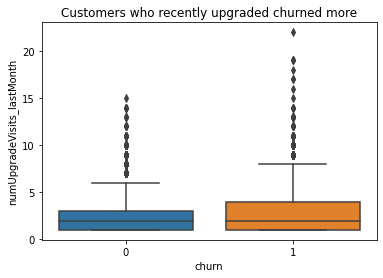

In [0]:
plt.title('Customers who recently upgraded churned more')
sns.boxplot(x="churn", y="numUpgradeVisits_lastMonth", data=all_data_pd)


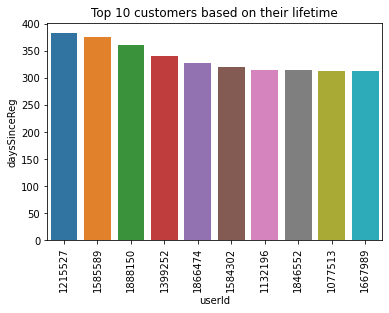

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers based on their lifetime')

g = sns.barplot(
    x='userId',
    y='daysSinceReg',
    data=all_data_pd.nlargest(10, 'daysSinceReg'),
)

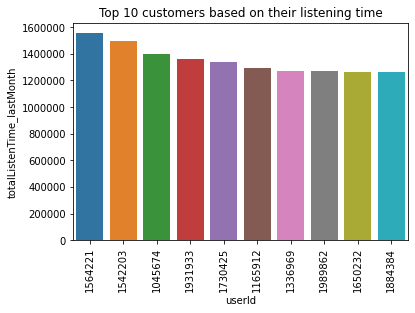

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers based on their listening time')

g = sns.barplot(
    x='userId',
    y='totalListenTime_lastMonth',
    data=all_data_pd.nlargest(10, 'totalListenTime_lastMonth'),
)

plt.ticklabel_format(style='plain', axis='y')

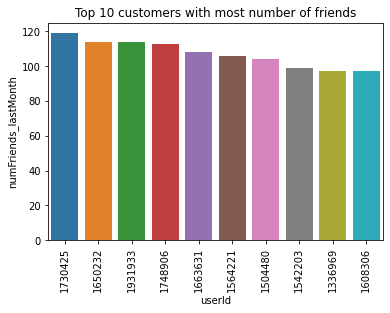

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers with most number of friends')

g = sns.barplot(
    x='userId',
    y='numFriends_lastMonth',
    data=all_data_pd.nlargest(10, 'numFriends_lastMonth'),
)

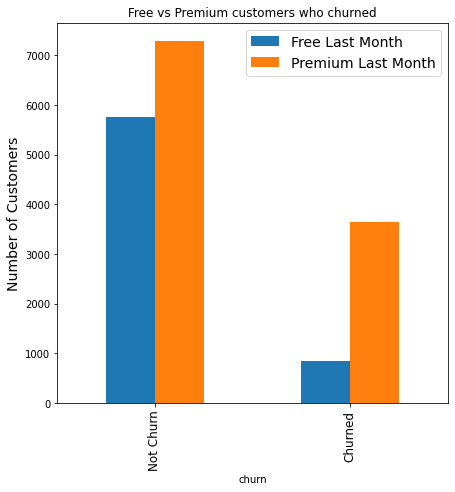

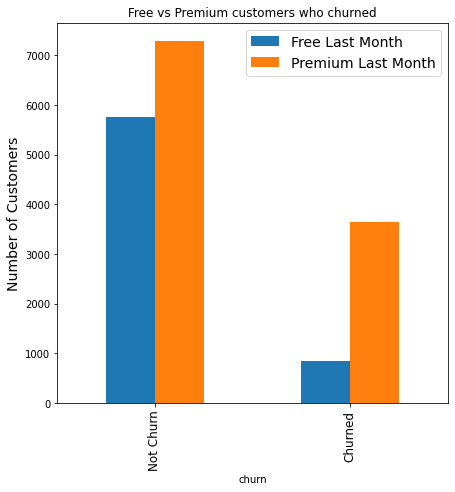

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'level_lastMonth']).agg({'level_lastMonth':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Free Last Month", "Premium Last Month"], fontsize=14);
ax.set_xticklabels(["Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
ax.set_title("Free vs Premium customers who churned")
display(fig)

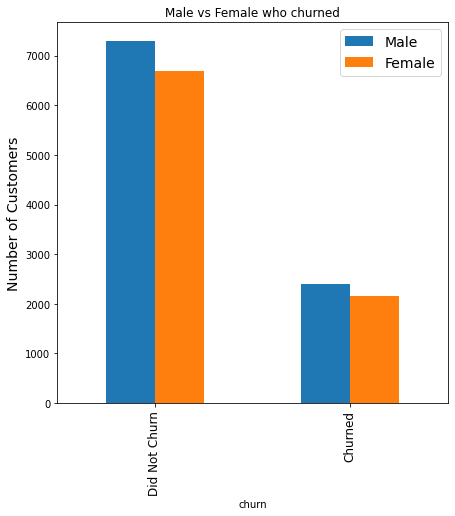

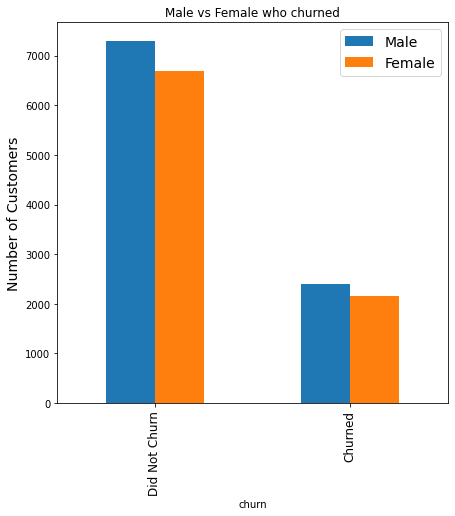

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'gender']).agg({'gender':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Male", "Female"], fontsize=14);
ax.set_xticklabels(["Did Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
ax.set_title("Male vs Female who churned")
display(fig)

In [0]:
convert_numeric = ['userId', 'level', 'gender', 'level_lastMonth']
for feat in convert_numeric:
    featName = feat + "_n"
    all_data = all_data.withColumn(featName, all_data[feat].cast("float"))
    all_data = all_data.drop(feat)
    
# fill na/null values with 0
all_data = all_data.na.fill(0.0)

In [0]:
all_data.persist()

Out[83]: DataFrame[months_btw: bigint, numCancelVisits: bigint, numUpgradeVisits: bigint, numDowngradeVisits: bigint, numHomeVisits: bigint, numAboutVisits: bigint, numSettingsVisits: bigint, numSaveSettings: bigint, numLogouts: bigint, numAddPlaylists: bigint, numFriends: bigint, numThumbsUp: bigint, numThumbsDown: bigint, numAdverts: bigint, numSongsPlayed: bigint, totalListenTime: double, avgSongsPerSession: double, numSingersPlayed: bigint, numSessions: bigint, daysSinceReg_duplicated: int, daysSinceReg: int, churn: int, numCancelVisits_lastMonth: bigint, numUpgradeVisits_lastMonth: bigint, numDowngradeVisits_lastMonth: bigint, numHomeVisits_lastMonth: bigint, numAboutVisits_lastMonth: bigint, numSettingsVisits_lastMonth: bigint, numSaveSettings_lastMonth: bigint, numLogouts_lastMonth: bigint, numAddPlaylists_lastMonth: bigint, numFriends_lastMonth: bigint, numThumbsUp_lastMonth: bigint, numThumbsDown_lastMonth: bigint, numAdverts_lastMonth: bigint, numSongsPlayed_lastMonth: bigint

In [0]:
#Only modelling with the last month data
model_data = all_data.filter(all_data.months_btw>0) \
.select('userId_n', 'months_btw', 'numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth','numSettingsVisits_lastMonth',\
        'numSaveSettings_lastMonth','numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',\
        'numAdverts_lastMonth', 'numSongsPlayed_lastMonth', 'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', \
        'numSessions_lastMonth', 'level_lastMonth_n', 'gender_n', 'daysSinceReg', 'churn'
        ).withColumnRenamed('churn', 'label')

In [0]:
model_data.printSchema()

root
 |-- userId_n: float (nullable = false)
 |-- months_btw: long (nullable = true)
 |-- numUpgradeVisits_lastMonth: long (nullable = true)
 |-- numDowngradeVisits_lastMonth: long (nullable = true)
 |-- numHomeVisits_lastMonth: long (nullable = true)
 |-- numAboutVisits_lastMonth: long (nullable = true)
 |-- numSettingsVisits_lastMonth: long (nullable = true)
 |-- numSaveSettings_lastMonth: long (nullable = true)
 |-- numLogouts_lastMonth: long (nullable = true)
 |-- numAddPlaylists_lastMonth: long (nullable = true)
 |-- numFriends_lastMonth: long (nullable = true)
 |-- numThumbsUp_lastMonth: long (nullable = true)
 |-- numThumbsDown_lastMonth: long (nullable = true)
 |-- numAdverts_lastMonth: long (nullable = true)
 |-- numSongsPlayed_lastMonth: long (nullable = true)
 |-- totalListenTime_lastMonth: double (nullable = false)
 |-- avgSongsPerSession_lastMonth: double (nullable = false)
 |-- numSingersPlayed_lastMonth: long (nullable = true)
 |-- numSessions_lastMonth: long (nullable =

In [0]:
inputColumns = ['numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'daysSinceReg']


assembler = VectorAssembler(inputCols=inputColumns, outputCol="FeaturesVec")

scaler = StandardScaler(inputCol="FeaturesVec", outputCol="features", withMean=True, withStd=True)

final_vector = VectorAssembler(inputCols=['level_lastMonth_n', 'gender_n']+['features'], 
                               outputCol='features_vector')

In [0]:
# Transform data
model_data = assembler.transform(model_data)

model_data_feature_standardize = scaler.fit(model_data)
model_data = model_data_feature_standardize.transform(model_data)

model_data = final_vector.transform(model_data)

In [0]:
model_data.printSchema()

root
 |-- userId_n: float (nullable = false)
 |-- months_btw: long (nullable = true)
 |-- numUpgradeVisits_lastMonth: long (nullable = true)
 |-- numDowngradeVisits_lastMonth: long (nullable = true)
 |-- numHomeVisits_lastMonth: long (nullable = true)
 |-- numAboutVisits_lastMonth: long (nullable = true)
 |-- numSettingsVisits_lastMonth: long (nullable = true)
 |-- numSaveSettings_lastMonth: long (nullable = true)
 |-- numLogouts_lastMonth: long (nullable = true)
 |-- numAddPlaylists_lastMonth: long (nullable = true)
 |-- numFriends_lastMonth: long (nullable = true)
 |-- numThumbsUp_lastMonth: long (nullable = true)
 |-- numThumbsDown_lastMonth: long (nullable = true)
 |-- numAdverts_lastMonth: long (nullable = true)
 |-- numSongsPlayed_lastMonth: long (nullable = true)
 |-- totalListenTime_lastMonth: double (nullable = false)
 |-- avgSongsPerSession_lastMonth: double (nullable = false)
 |-- numSingersPlayed_lastMonth: long (nullable = true)
 |-- numSessions_lastMonth: long (nullable =

In [0]:
#final data
model_data = model_data.select(model_data.label, model_data.features_vector)
model_data.show(5)

+-----+--------------------+
|label|     features_vector|
+-----+--------------------+
|    1|[1.0,0.0,2.764485...|
|    0|[1.0,1.0,-0.77677...|
|    0|[1.0,1.0,-0.27088...|
|    0|[0.0,0.0,-0.77677...|
|    0|[1.0,0.0,2.764485...|
+-----+--------------------+
only showing top 5 rows



In [0]:
train,test = model_data.randomSplit([0.6, 0.4], seed=40)

In [0]:
def evaluate_model(results):
    """ Prints the confusion matrix """
    tn = results.filter((results.prediction == 0)&(results.label==0)).count() * 1.0 # true negative
    fp = results.filter((results.prediction == 1)&(results.label==0)).count() * 1.0 # false positive
    fn = results.filter((results.prediction == 0)&(results.label==1)).count() * 1.0 # false negative
    tp = results.filter((results.prediction == 1)&(results.label==1)).count() * 1.0 # true positive
    print("Confusion Matrix")
    print("TN:{} | FP:{}".format(tn,fp))
    print("FN:{} | TP: {}".format(fn, tp))
    print("--------------")
    evaluator = MulticlassClassificationEvaluator(predictionCol='prediction')
    evaluator.setLabelCol('label')
    accuracy = evaluator.evaluate(results, {evaluator.metricName : 'accuracy'})
    f1 = evaluator.evaluate(results, {evaluator.metricName : 'f1'})
# #     precision = evaluator.evaluate(results, {evaluator.metricName : 'precision'})
#     recall = evaluator.evaluate(results, {evaluator.metricName : 'recall'})
#     accuracy = (tp+tn)/(tn+fp+fn+tp) 
    precision = tp/(tp+fp) if tp+fp!=0 else 0
    recall = tp/(tp+fn) if tp+fn!=0 else 0
#     f1 = 2.0 * (precision * recall)/(precision + recall)
    print("F1-Score: {}".format(f1))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("Accuracy: {}".format(accuracy))

In [0]:
#baseline model
baseline = test.withColumn('prediction', lit(0.0))
baseline.show(5)

+-----+--------------------+----------+
|label|     features_vector|prediction|
+-----+--------------------+----------+
|    0|[0.0,0.0,-0.77677...|       0.0|
|    0|[0.0,0.0,-0.27088...|       0.0|
|    0|[0.0,0.0,-0.27088...|       0.0|
|    0|[0.0,0.0,-0.27088...|       0.0|
|    0|[0.0,1.0,-0.77677...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [0]:
#print baseline model
baseline_result = evaluate_model(baseline)

Confusion Matrix
TN:5614.0 | FP:0.0
FN:1845.0 | TP: 0.0
--------------
F1-Score: 0.6464261905007787
Precision: 0
Recall: 0.0
Accuracy: 0.7526478080171605


In [0]:
START = time.time()
numFolds = 2
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.01])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:38.0 | TP: 6.0
--------------
F1-Score: 0.6778232943869351
Precision: 0.6666666666666666
Recall: 0.13636363636363635
Accuracy: 0.7453416149068323
Best regression parameter is 0.01


In [0]:
START = time.time()
numFolds = 2
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:5339.0 | FP:275.0
FN:1369.0 | TP: 476.0
--------------
F1-Score: 0.7429381212125986
Precision: 0.6338215712383488
Recall: 0.25799457994579944
Accuracy: 0.7795951199892747
Best regression parameter is 0.001


In [0]:
START = time.time()
numFolds = 3
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:115.0 | FP:2.0
FN:41.0 | TP: 3.0
--------------
F1-Score: 0.6457092153631638
Precision: 0.6
Recall: 0.06818181818181818
Accuracy: 0.7329192546583851
Best regression parameter is 0.1


In [0]:
START = time.time()
numFolds = 4
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:38.0 | TP: 6.0
--------------
F1-Score: 0.6778232943869351
Precision: 0.6666666666666666
Recall: 0.13636363636363635
Accuracy: 0.7453416149068323
Best regression parameter is 0.01


In [0]:
numFolds = 2
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:5296.0 | FP:318.0
FN:1346.0 | TP: 499.0
--------------
F1-Score: 0.7431944803334671
Precision: 0.6107711138310894
Recall: 0.2704607046070461
Accuracy: 0.776913795414935
Best number of trees 20, best depth 10


In [0]:
numFolds = 3
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:35.0 | TP: 9.0
--------------
F1-Score: 0.7107364685004436
Precision: 0.75
Recall: 0.20454545454545456
Accuracy: 0.7639751552795031
Best number of trees 20, best depth 10


In [0]:
numFolds = 4
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:115.0 | FP:2.0
FN:35.0 | TP: 9.0
--------------
F1-Score: 0.7154442040616931
Precision: 0.8181818181818182
Recall: 0.20454545454545456
Accuracy: 0.7701863354037267
Best number of trees 20, best depth 20


In [0]:
numFolds = 2
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:5533.0 | FP:81.0
FN:1637.0 | TP: 208.0
--------------
F1-Score: 0.6997205368057446
Precision: 0.7197231833910035
Recall: 0.11273712737127371
Accuracy: 0.7696742190642177
Best number of iterations 10


In [0]:
numFolds = 3
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:117.0 | FP:0.0
FN:44.0 | TP: 0.0
--------------
F1-Score: 0.6116895303632871
Precision: 0
Recall: 0.0
Accuracy: 0.7267080745341615
Best number of iterations 10


In [0]:
numFolds = 4
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:117.0 | FP:0.0
FN:44.0 | TP: 0.0
--------------
F1-Score: 0.6116895303632871
Precision: 0
Recall: 0.0
Accuracy: 0.7267080745341615
Best number of iterations 10


In [0]:
numFolds = 2
gbt = GBTClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[gbt])
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [10,20])
                 .addGrid(gbt.maxDepth, [10,20])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=gbt_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

gbt_start = time.time()
gbt_model = crossval.fit(train)
gbt_end = time.time()

In [0]:
gbt_results = gbt_model.transform(test)

gbt_safe = evaluate_model(gbt_results)

best_param = list(gbt_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of iterations {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:5029.0 | FP:585.0
FN:1206.0 | TP: 639.0
--------------
F1-Score: 0.7418865551651397
Precision: 0.5220588235294118
Recall: 0.3463414634146341
Accuracy: 0.7598873843678777
Best number of iterations 20, best depth 10


In [0]:
numFolds = 3
gbt = GBTClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[gbt])
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [10,20])
                 .addGrid(gbt.maxDepth, [10,20])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=gbt_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

gbt_start = time.time()
gbt_model = crossval.fit(train)
gbt_end = time.time()

In [0]:
gbt_results = gbt_model.transform(test)

gbt_safe = evaluate_model(gbt_results)

best_param = list(gbt_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of iterations {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:99.0 | FP:18.0
FN:34.0 | TP: 10.0
--------------
F1-Score: 0.6514672187715667
Precision: 0.35714285714285715
Recall: 0.22727272727272727
Accuracy: 0.6770186335403726
Best number of iterations 20, best depth 20


[0.00737991 0.01792736 0.05159907 0.06166889 0.08152662 0.0314069
 0.04517808 0.02146839 0.04902779 0.06998865 0.06767632 0.05716766
 0.06989132 0.06513963 0.03374794 0.0174316  0.05910905 0.02559182
 0.07367904 0.09339393]


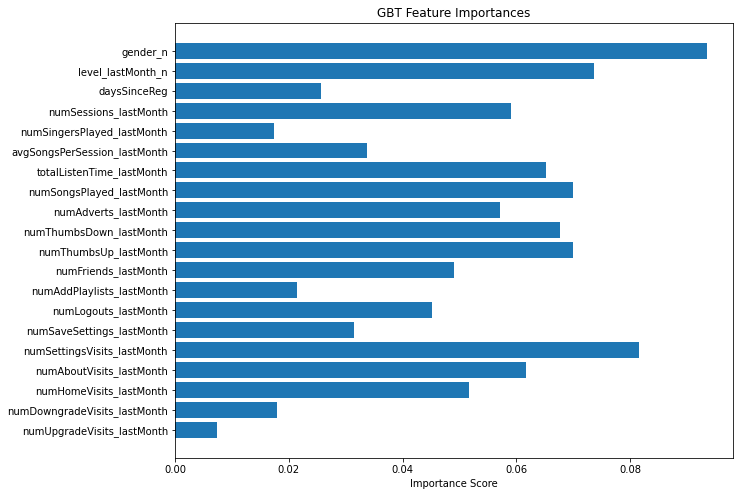

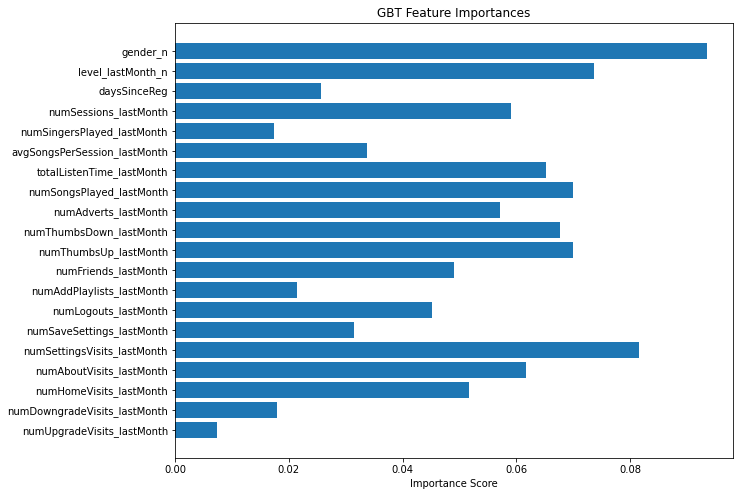

In [0]:
importances = gbt_model.bestModel.stages[-1].featureImportances.toArray()
print(importances)

inputColumns = ['numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'daysSinceReg', 'level_lastMonth_n', 'gender_n']

y_pos = np.arange(len(inputColumns))
    
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y_pos, importances)
plt.yticks(y_pos, inputColumns);
plt.xlabel('Importance Score');
plt.title('GBT Feature Importances');
display(fig)